# Visualizing Supervised Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
plt.xkcd()

In [4]:
# if this is true, all images are saved to disk
global_print_flag = True

In [5]:
!mkdir tmp_figures

A subdirectory or file tmp_figures already exists.


In [6]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26935  100 26935    0     0  86054      0 --:--:-- --:--:-- --:--:-- 86054


In [7]:
import pandas as pd
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [8]:
df.head()

max speed   age  thousand km per year  group
0      148.0  44.0                  25.0      1
1      168.0  54.0                  24.0      1
2      161.0  26.0                  34.0      0
3      137.0  25.0                  10.0      2
4      164.0  38.0                  22.0      1

In [9]:
df.describe()

max speed          age  thousand km per year        group
count  1500.000000  1500.000000           1500.000000  1500.000000
mean    171.386000    44.969333             30.511333     0.998667
std      19.269126    16.935040             15.112317     0.816768
min     118.000000    18.000000              5.000000     0.000000
25%     158.000000    32.000000             18.000000     0.000000
50%     170.000000    42.000000             29.000000     1.000000
75%     187.000000    55.000000             42.000000     2.000000
max     216.000000    90.000000             84.000000     2.000000

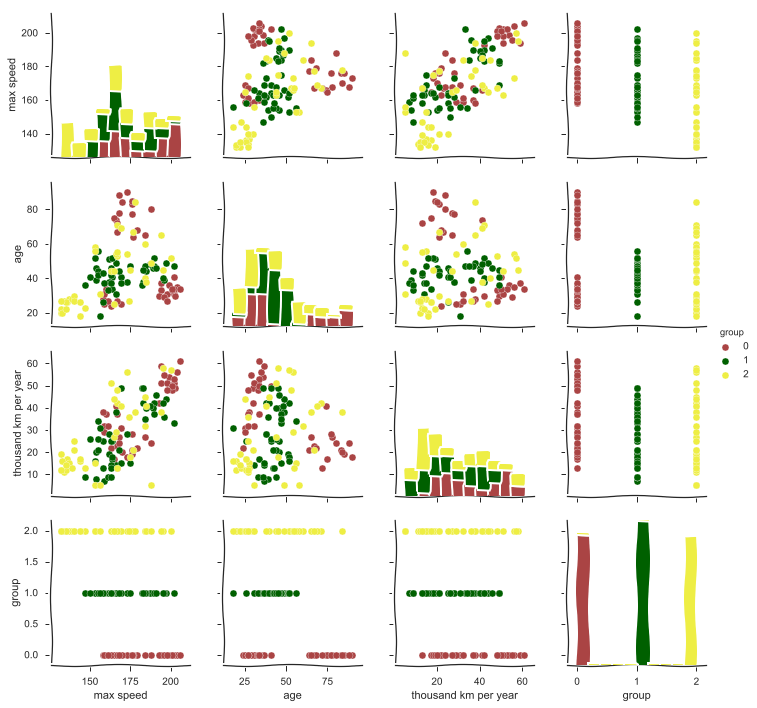

In [10]:
import seaborn as sns
sns.set(style="ticks")

sample_df = df.sample(n=120, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#EEEE44'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [10]:
y=df['group']

In [11]:
df.drop('group', axis='columns', inplace=True)

In [12]:
X = df.as_matrix()

## We restrict ourselves to two dimensions for now

In [274]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        plt.savefig('tmp_figures/'+fname)
        
def plot_keras_prediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                          mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        plt.savefig('tmp_figures/'+fname)

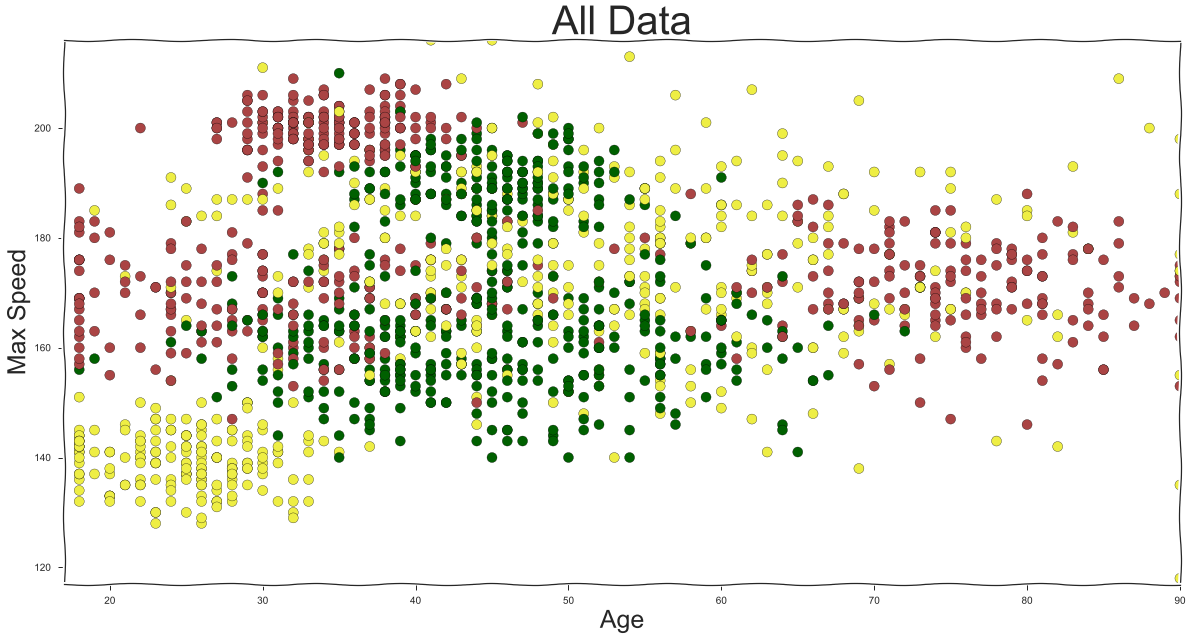

In [275]:
X_kmh_age = X[:, :2] 
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data",
                fname='all.png')

## We provide a few hand built classifiers as base lines

In [15]:
# 0: red
# 1: green
# 2: yellow

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)

In [16]:
random_clf = RandomClassifier()

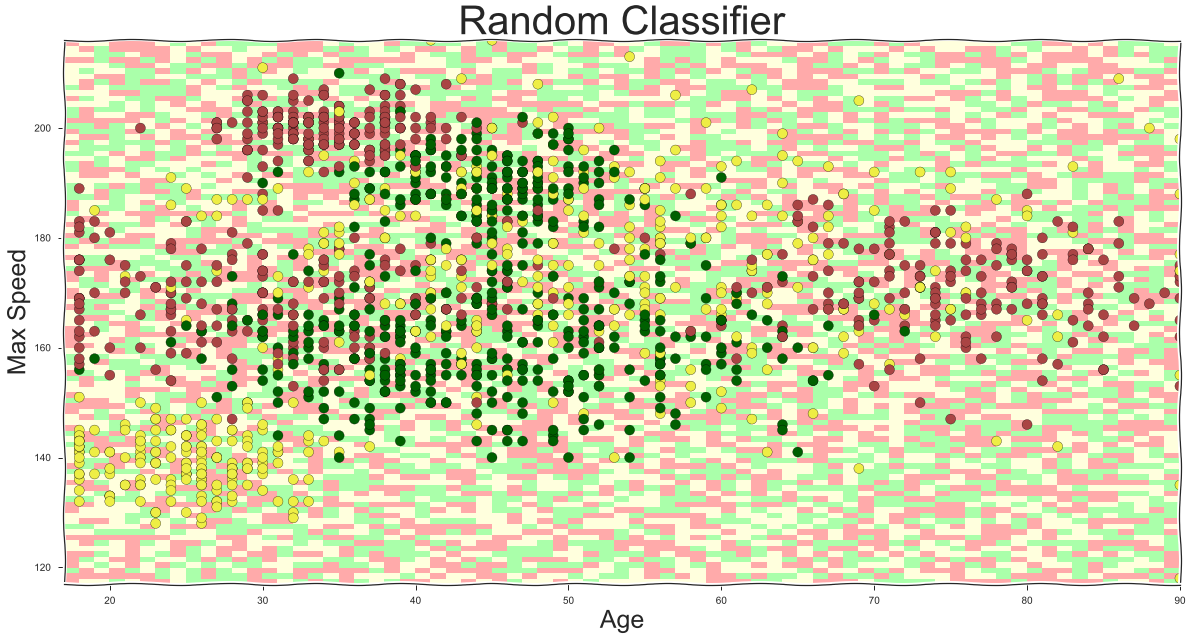

In [276]:
plotPrediction(random_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Random Classifier",
                fname='random.png')

In [18]:
random_clf.score(X, y)

0.34

In [19]:
class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1

In [20]:
base_clf = BaseLineClassifier()

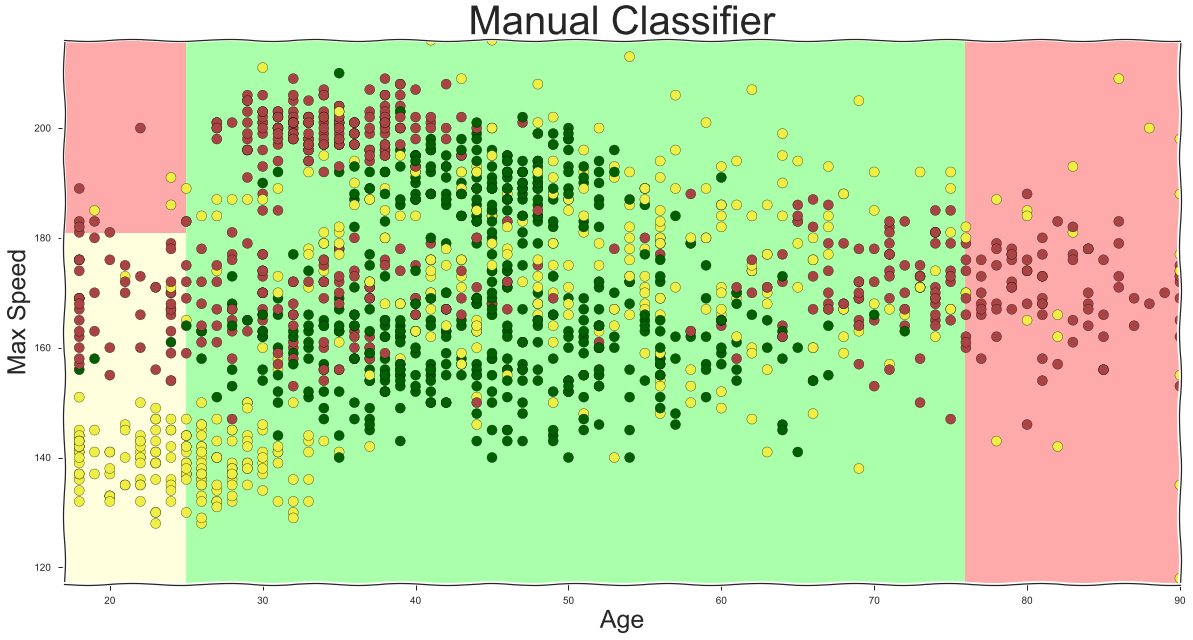

In [277]:
plotPrediction(base_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Manual Classifier",
                fname='prog.png')

In [22]:
base_clf.score(X, y)

0.454

## Second important concept: To have an idea how well the training worked, we save same data to try our model on previously unseen data. How well it performs on this test data as opposed to the training data tells us quite a bit as well.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=int64), array([301, 300, 299], dtype=int64))

In [27]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2], dtype=int64), array([200, 200, 200], dtype=int64))

In [28]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

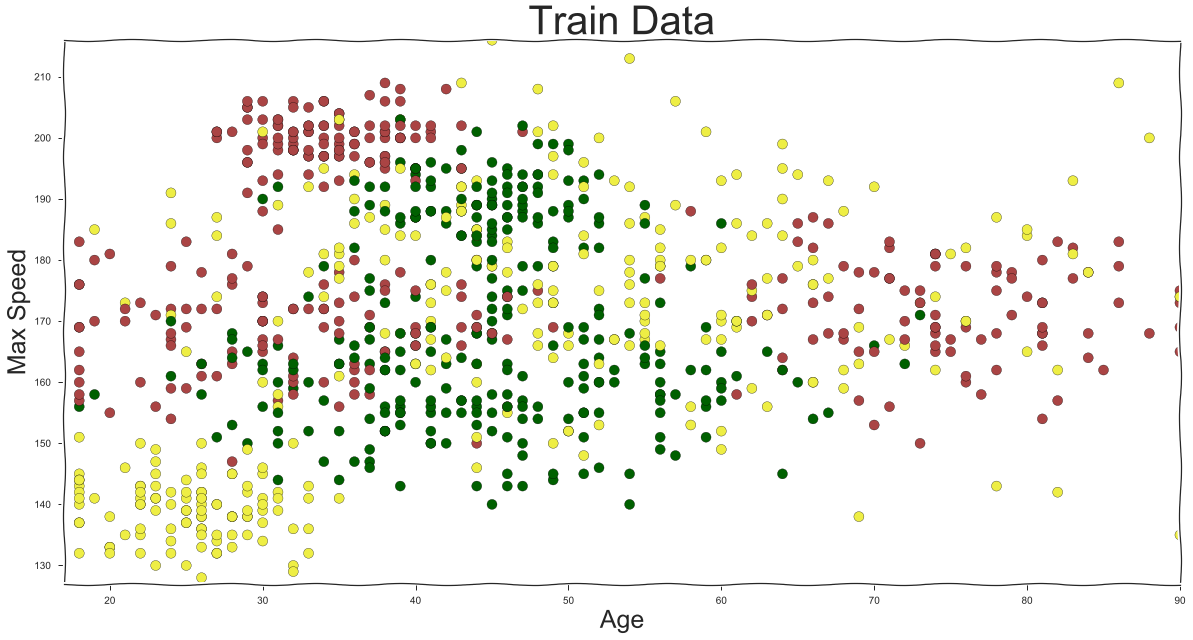

In [278]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data",
                fname='train.png')

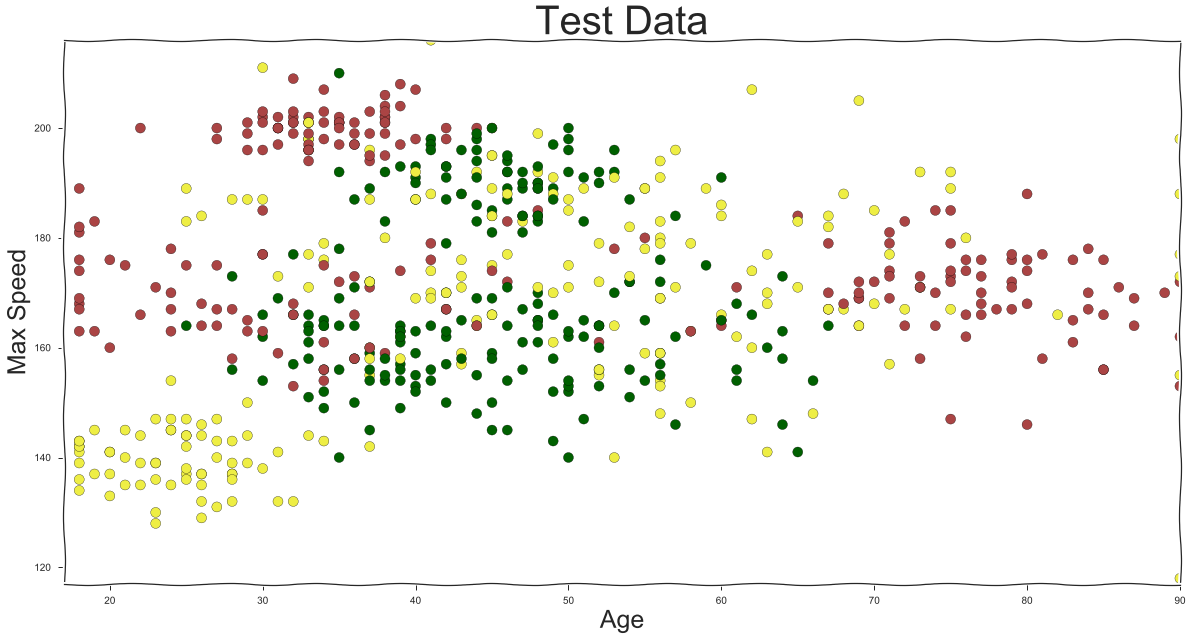

In [279]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data",
                fname='test.png')

## KNN - Most basic learning strategy: Look at the neighbors to make a prediction for a sample yet unknown

In [282]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(1)

In [283]:
%time clf.fit(X_train_2_dim, y_train)

Wall time: 971 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

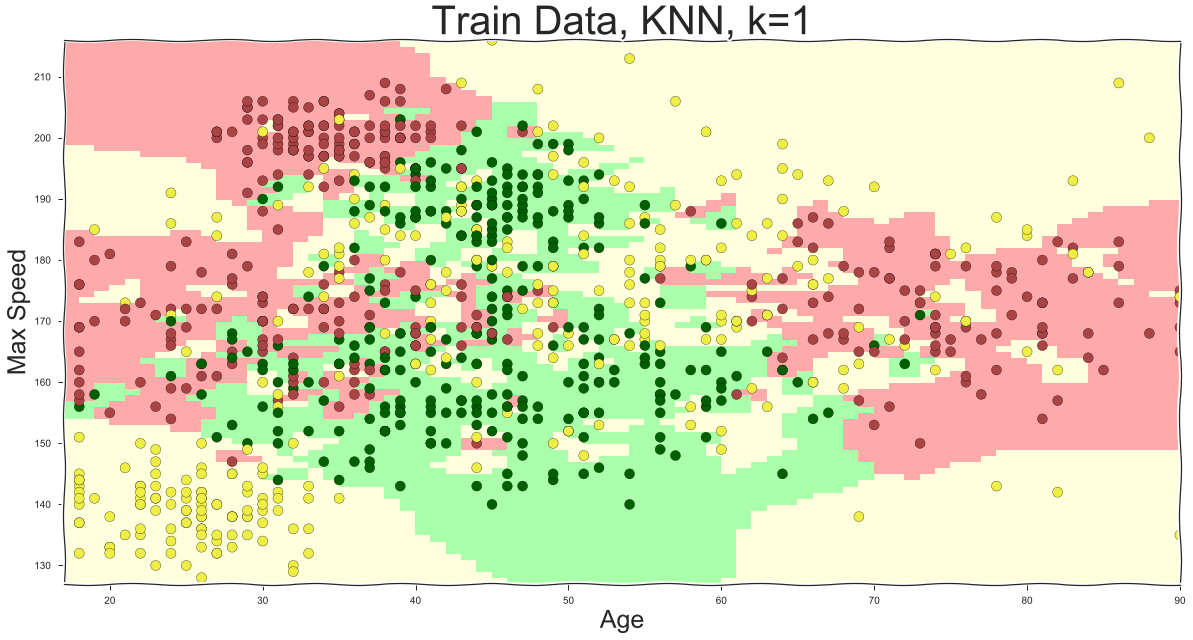

In [284]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=1",
                fname='knn1-train.png')

In [285]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

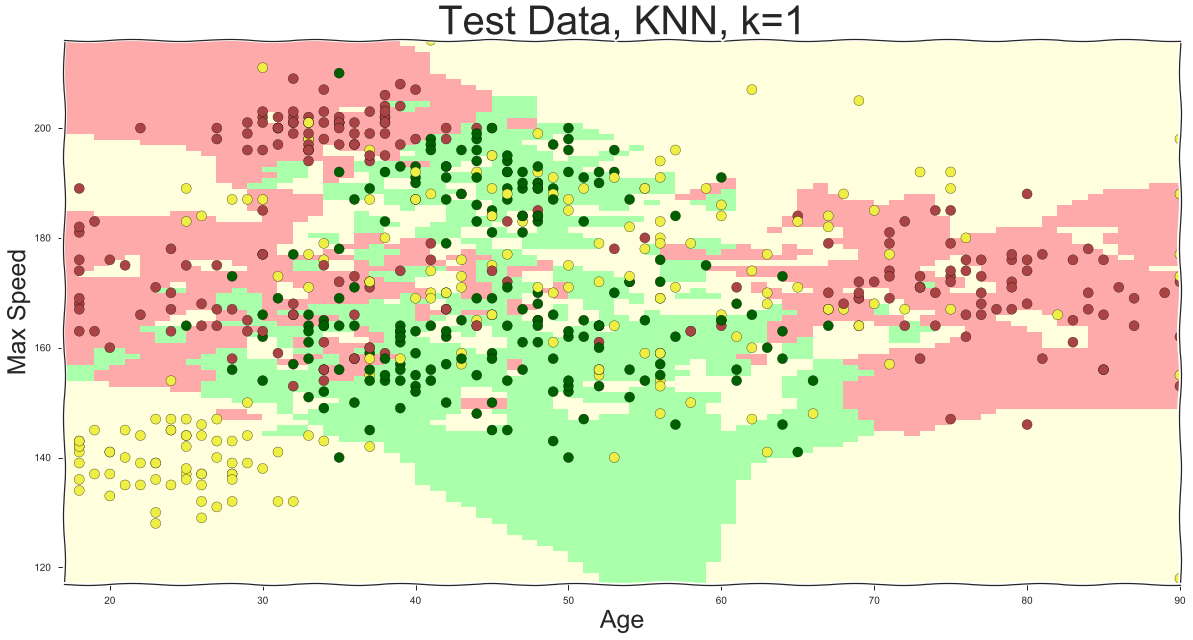

In [286]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=1",
                fname='knn1-test.png')

In [287]:
clf.score(X_test_2_dim, y_test)

0.6366666666666667

In [288]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [289]:
# cross_val_score?

In [290]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.61129568, 0.66666667, 0.65217391])

In [291]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.05)


## Third important concept: Our objective is to make the best prediction for unknown samples. This is called generalization. If we perform well on knwon data, but less good on unknown data this is called overfitting. This is to be avoided.

### In KNN we reduce overfitting by taking more neighbors into account

In [292]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance']
    }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 7.98 s


{'n_neighbors': 23, 'weights': 'uniform'}

In [293]:
clf = KNeighborsClassifier(n_neighbors=23, weights='uniform')
%time clf.fit(X_train_2_dim, y_train)

Wall time: 3 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

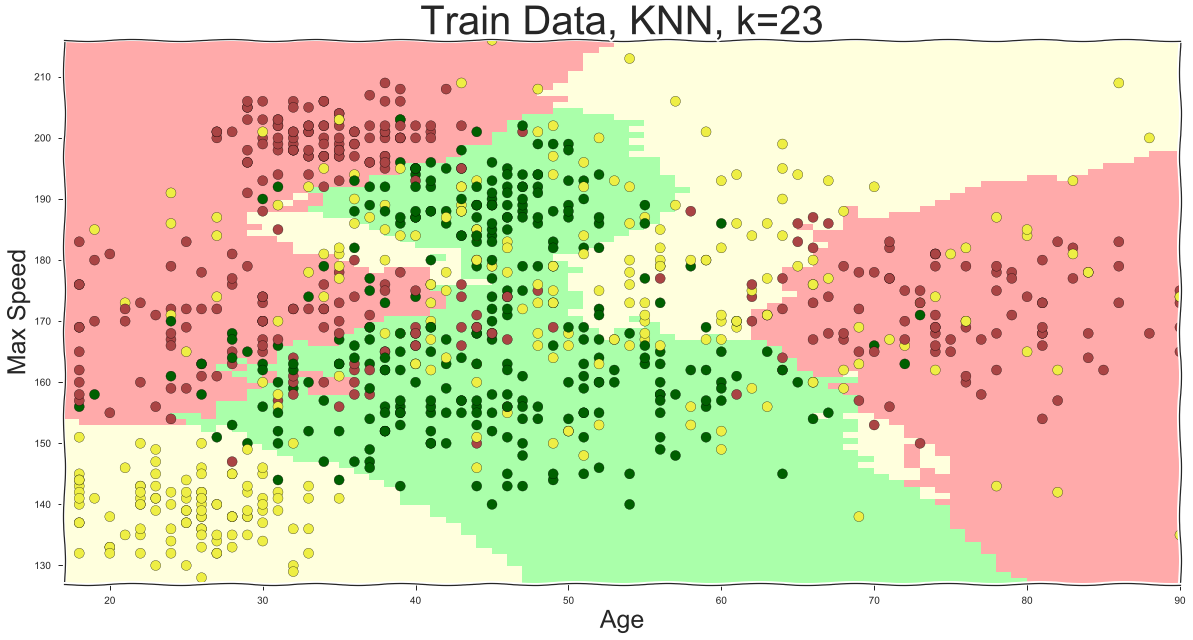

In [294]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=23",
                fname='knn23-train.png')

### A rule of thumb: Smoother decision boundaries imply less overfitting

In [295]:
clf.score(X_train_2_dim, y_train)

0.7322222222222222

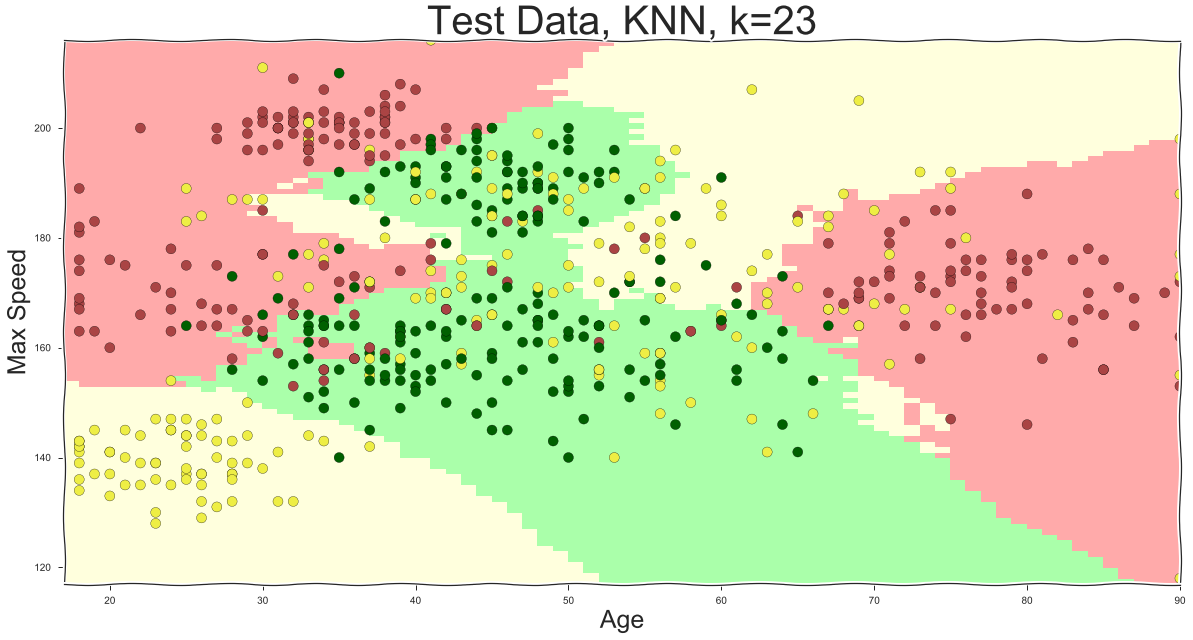

In [296]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=23",
                fname='knn23-test.png')

In [46]:
clf.score(X_test_2_dim, y_test)

0.7216666666666667

In [47]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.68106312, 0.74666667, 0.69565217])

In [48]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.06)


## Descision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
clf.tree_.max_depth

20

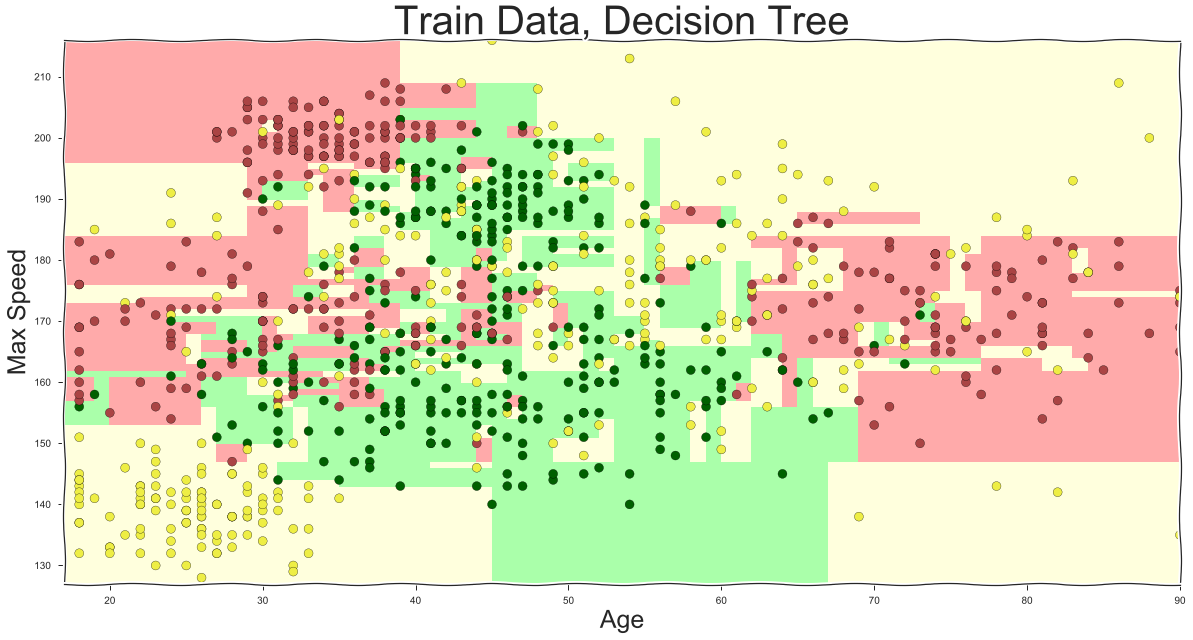

In [51]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree")

In [52]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

In [53]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.56810631, 0.61      , 0.63210702])

In [54]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.05)


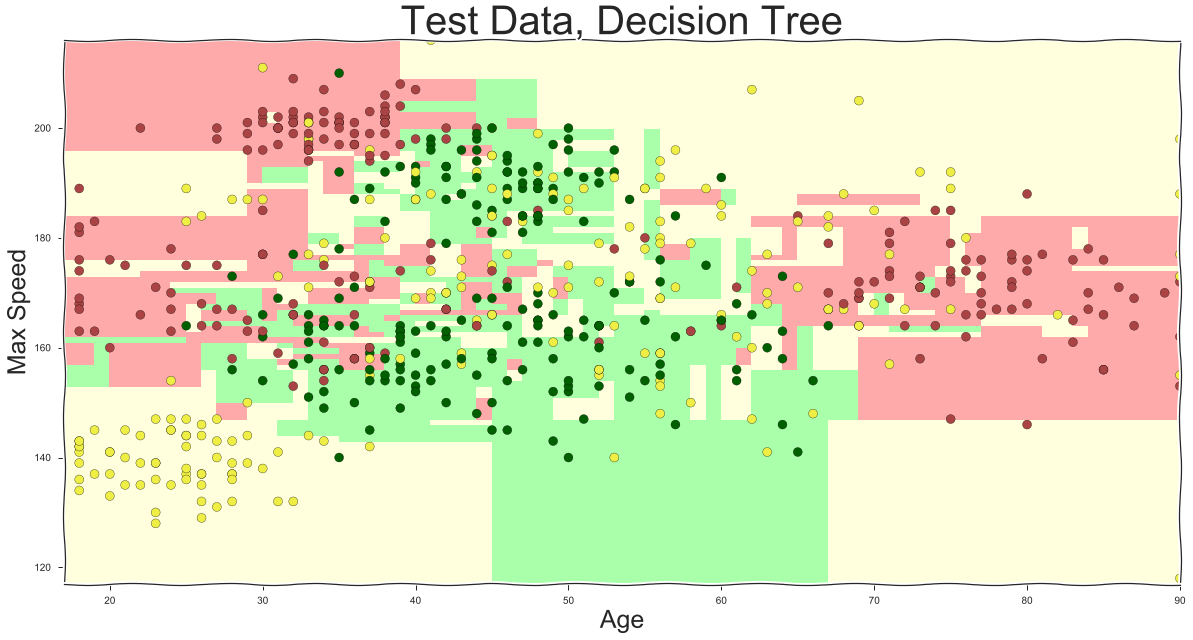

In [55]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree")

In [56]:
clf.score(X_test_2_dim, y_test)

0.605

In [57]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 15.6 s


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}

In [58]:
clf = DecisionTreeClassifier(max_depth=7,
                              min_samples_leaf=4,
                              min_samples_split=19)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=19,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
clf.tree_.max_depth

7

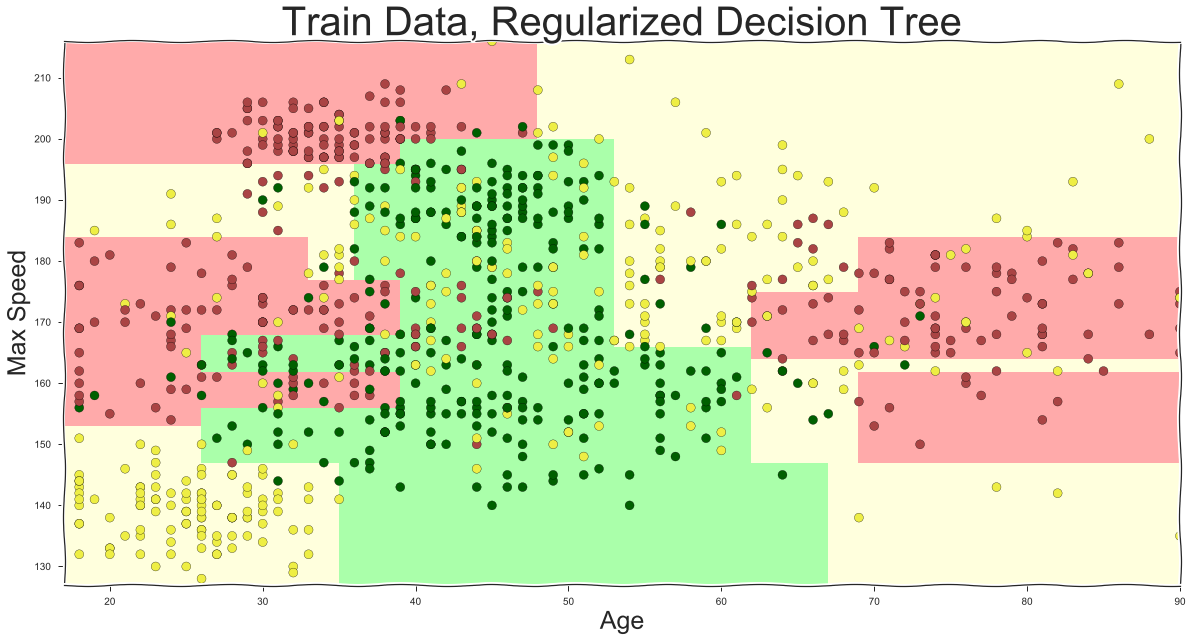

In [60]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree")

In [61]:
clf.score(X_train_2_dim, y_train)

0.7677777777777778

In [62]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.69435216, 0.73333333, 0.68227425])

In [63]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.04)


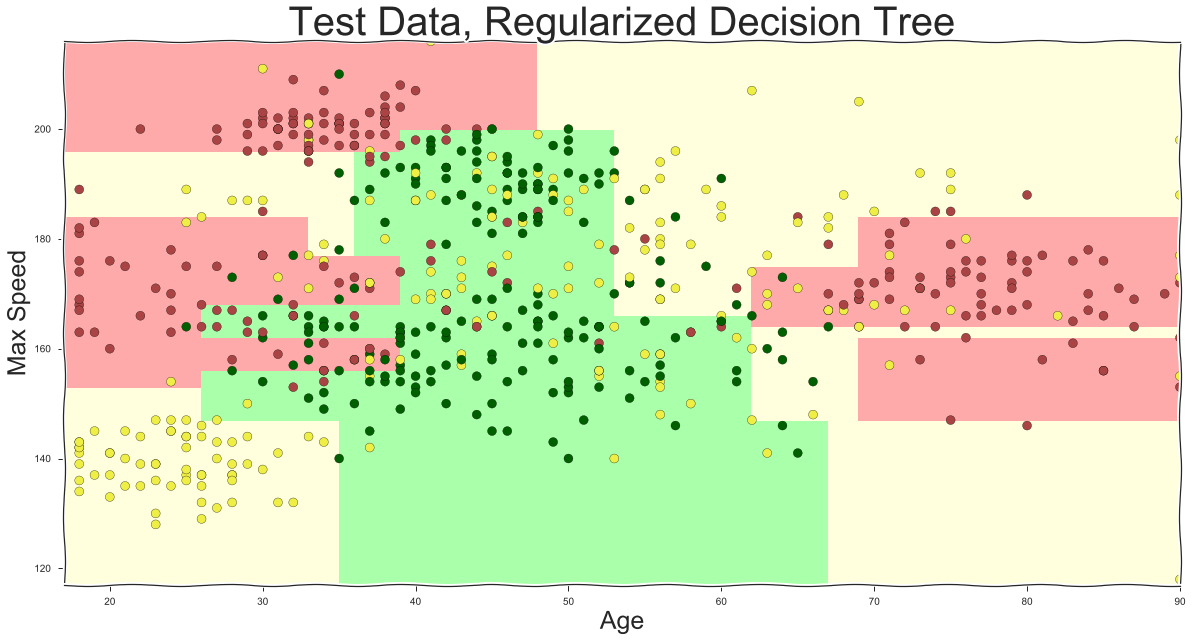

In [64]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree")

In [65]:
clf.score(X_test_2_dim, y_test)

0.7

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 136 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
clf.score(X_train_2_dim, y_train)

0.9488888888888889

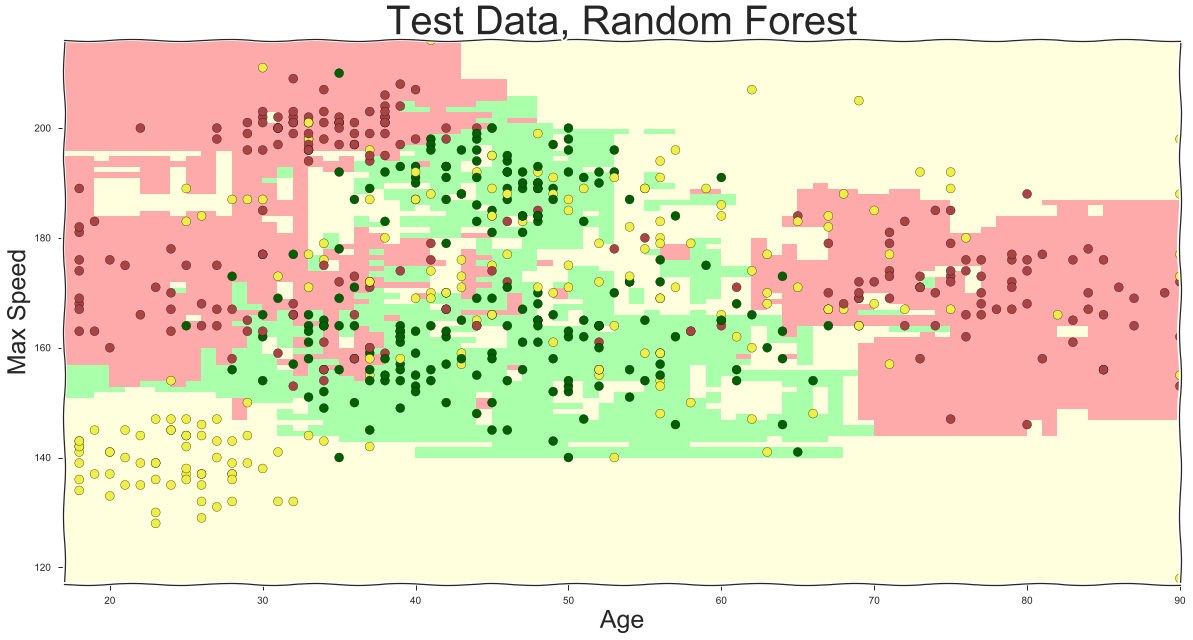

In [68]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Random Forest")

In [69]:
clf.score(X_test_2_dim, y_test)

0.6516666666666666

In [76]:
# brute force grid search is far too expensive

param_grid = {
    'n_estimators': list(range(3,20)),
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
# %time clf.fit(X_train_2_dim, y_train)
# clf.best_params_

In [71]:
# http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(3,20),
    "max_depth": randint(2, 25),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}

clf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=1000, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 28.8 s


{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 13}

In [93]:
# parameters might vary a bit with each run, because it is a random search
clf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=13, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 114 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
clf.score(X_train_2_dim, y_train)

0.7477777777777778

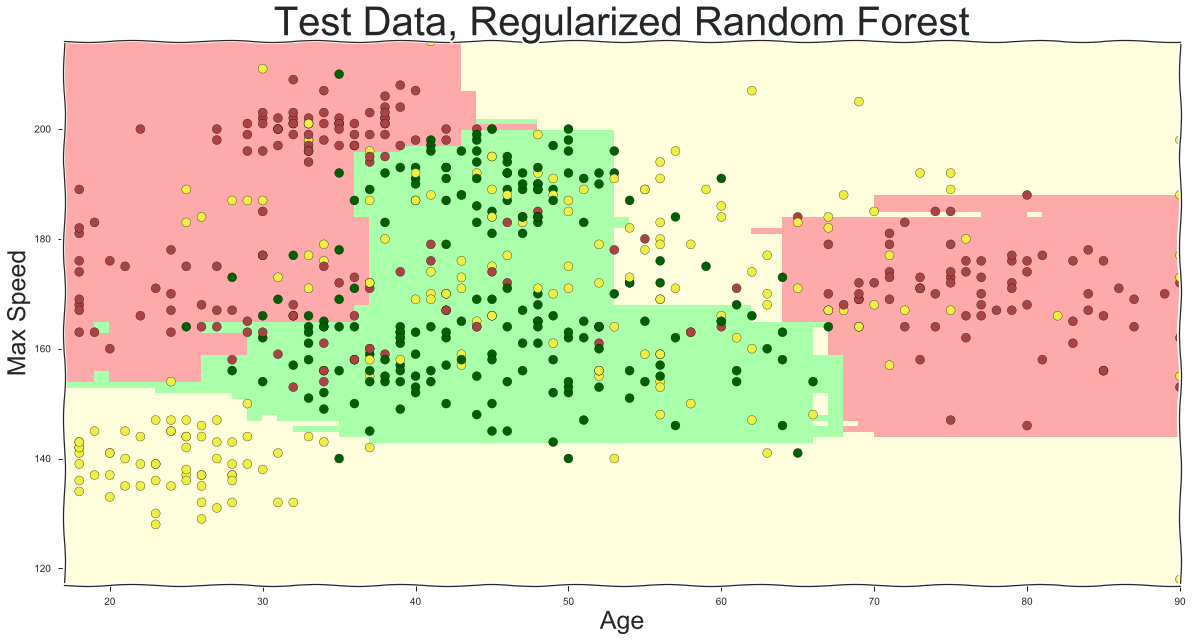

In [95]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Random Forest")

In [96]:
clf.score(X_test_2_dim, y_test)

0.7116666666666667

## Support Vector Machines (SVM)

In [142]:
from sklearn.svm import SVC
clf = SVC()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 49 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
clf.score(X_train_2_dim, y_train)

0.9166666666666666

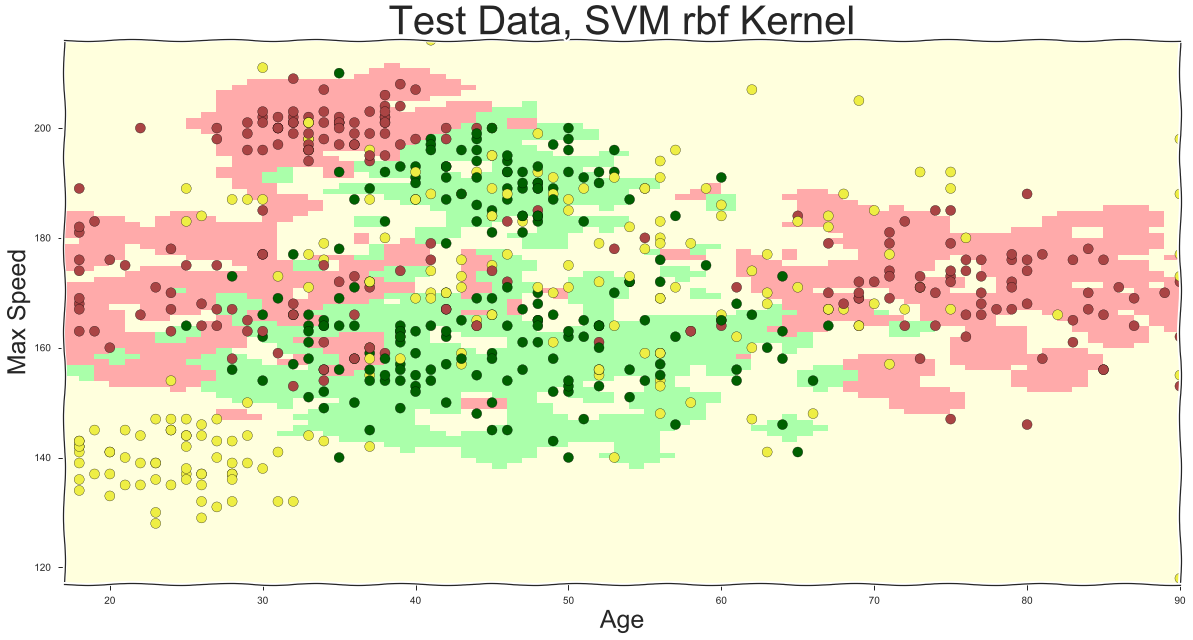

In [144]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM rbf Kernel")

In [101]:
clf.score(X_test_2_dim, y_test)

0.6533333333333333

In [118]:
# SVC?

In [135]:
param_grid = {
    'C': list(np.append(np.arange(0.1, 1.0, 0.1), np.arange(2, 10, 1))),
    'gamma': list(np.append(np.arange(0.001, 0.1, 0.0005), np.arange(.02, 1.0, 0.1))),
}
clf = GridSearchCV(SVC(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 1min 7s


{'C': 8.0, 'gamma': 0.001}

In [268]:
clf = SVC(C=8, gamma=0.001)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 25 ms


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [269]:
clf.score(X_train_2_dim, y_train)

0.7333333333333333

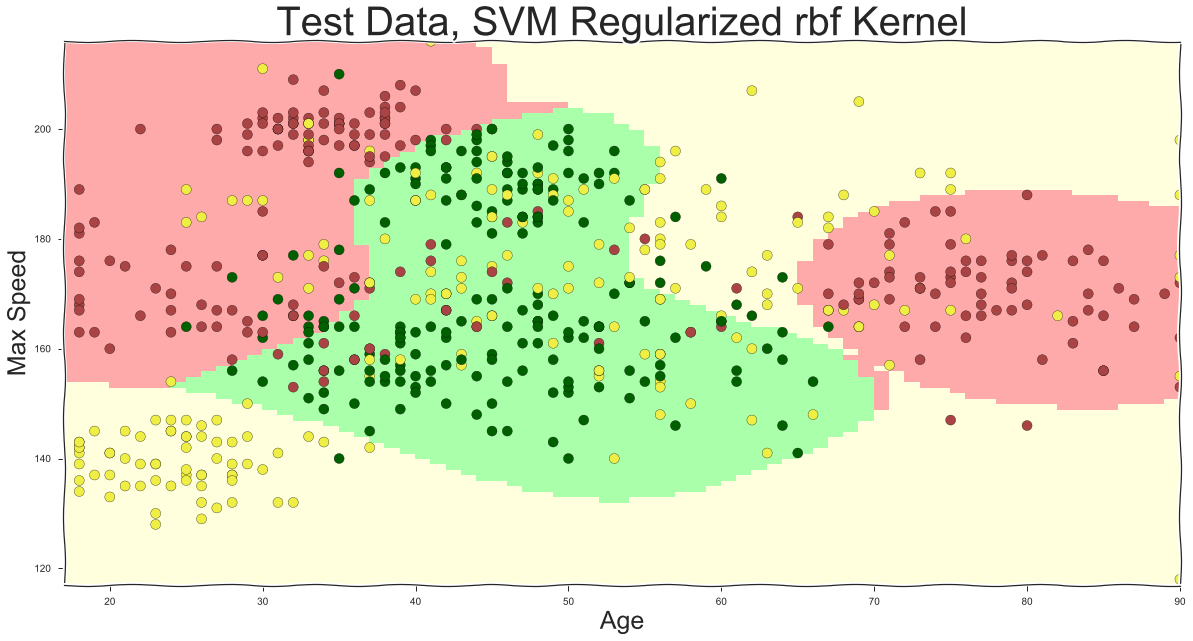

In [270]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM Regularized rbf Kernel",
                fname='svm-reg-test.png')

In [139]:
clf.score(X_test_2_dim, y_test)

0.73

## Neural Networks using TensorFlow and Keras Layers

In [145]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.8.0


In [146]:
# let's see what compute devices we have available, hopefully a GPU
sess = tf.Session()
devices = sess.list_devices()
for d in devices:
    print(d.name)
hello = tf.constant('Hello TF!')
print(sess.run(hello))

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0
b'Hello TF!'


In [148]:
# tiny little pieces of feature engeneering, we need a one-hot-encoding for our 3 groups
num_categories = 3

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_categories)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_categories)

In [202]:
tf.keras.layers.Dense?

In [226]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(500, name='hidden1', activation='tanh', input_dim=2))
model.add(tf.keras.layers.Dense(500, name='hidden2', activation='tanh'))
# model.add(tf.keras.layers.Dense(500, name='hidden1', activation='relu', input_dim=2))
# model.add(tf.keras.layers.Dense(500, name='hidden2', activation='relu'))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 500)               1500      
_________________________________________________________________
hidden2 (Dense)              (None, 500)               250500    
_________________________________________________________________
softmax (Dense)              (None, 3)                 1503      
Total params: 253,503
Trainable params: 253,503
Non-trainable params: 0
_________________________________________________________________


In [227]:
# tf.keras.optimizers.Adam?

In [228]:
# https://keras.io/optimizers/
sgd = tf.keras.optimizers.SGD(lr=1, decay=1e-6, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(lr=1)

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
#              optimizer=adam,
#              optimizer=sgd,
             metrics=['accuracy'])

In [229]:
BATCH_SIZE=1000
EPOCHS = 2000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.epoch-{epoch:02d}-val_loss-{val_loss:.2f}.hdf5',
#                                                 verbose = 1, save_best_only=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.hdf5', verbose = 1, save_best_only=True)

# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
%time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/5000
720/720 [==============================] - 1s 989us/step - loss: 1.3006 - acc: 0.3361 - val_loss: 3.5712 - val_acc: 0.3222
Epoch 2/5000
720/720 [==============================] - 0s 18us/step - loss: 3.6011 - acc: 0.3222 - val_loss: 3.3948 - val_acc: 0.3333
Epoch 3/5000
720/720 [==============================] - 0s 14us/step - loss: 3.4307 - acc: 0.3333 - val_loss: 2.4946 - val_acc: 0.3389
Epoch 4/5000
720/720 [==============================] - 0s 15us/step - loss: 2.5173 - acc: 0.3306 - val_loss: 1.1801 - val_acc: 0.3389
Epoch 5/5000
720/720 [==============================] - 0s 14us/step - loss: 1.1802 - acc: 0.3306 - val_loss: 1.8538 - val_acc: 0.3278
Epoch 6/5000
720/720 [==============================] - 0s 14us/step - loss: 1.8143 - acc: 0.3361 - val_loss: 2.0402 - val_acc: 0.3278
Epoch 7/5000
720/720 [==============================] - 0s 14us/step - loss: 1.9914 - acc: 0.3361 - val_loss: 1.8329 - val_acc: 0.5111
Epoch 8/

Epoch 61/5000
720/720 [==============================] - 0s 17us/step - loss: 0.8832 - acc: 0.5792 - val_loss: 0.9720 - val_acc: 0.5500
Epoch 62/5000
720/720 [==============================] - 0s 11us/step - loss: 0.8820 - acc: 0.5833 - val_loss: 0.9743 - val_acc: 0.5389
Epoch 63/5000
720/720 [==============================] - 0s 11us/step - loss: 0.8818 - acc: 0.5847 - val_loss: 0.9766 - val_acc: 0.5444
Epoch 64/5000
720/720 [==============================] - 0s 12us/step - loss: 0.8819 - acc: 0.5847 - val_loss: 0.9767 - val_acc: 0.5444
Epoch 65/5000
720/720 [==============================] - 0s 12us/step - loss: 0.8810 - acc: 0.5861 - val_loss: 0.9756 - val_acc: 0.5389
Epoch 66/5000
720/720 [==============================] - 0s 11us/step - loss: 0.8799 - acc: 0.5861 - val_loss: 0.9752 - val_acc: 0.5556
Epoch 67/5000
720/720 [==============================] - 0s 13us/step - loss: 0.8793 - acc: 0.5944 - val_loss: 0.9761 - val_acc: 0.5500
Epoch 68/5000
720/720 [=========================

720/720 [==============================] - 0s 14us/step - loss: 0.8480 - acc: 0.6292 - val_loss: 0.9533 - val_acc: 0.6111
Epoch 122/5000
720/720 [==============================] - 0s 15us/step - loss: 0.8474 - acc: 0.6306 - val_loss: 0.9534 - val_acc: 0.6111
Epoch 123/5000
720/720 [==============================] - 0s 12us/step - loss: 0.8468 - acc: 0.6319 - val_loss: 0.9535 - val_acc: 0.6111
Epoch 124/5000
720/720 [==============================] - 0s 13us/step - loss: 0.8462 - acc: 0.6306 - val_loss: 0.9526 - val_acc: 0.6111
Epoch 125/5000
720/720 [==============================] - 0s 12us/step - loss: 0.8457 - acc: 0.6319 - val_loss: 0.9519 - val_acc: 0.6167
Epoch 126/5000
720/720 [==============================] - 0s 26us/step - loss: 0.8451 - acc: 0.6347 - val_loss: 0.9513 - val_acc: 0.6167
Epoch 127/5000
720/720 [==============================] - 0s 14us/step - loss: 0.8445 - acc: 0.6375 - val_loss: 0.9503 - val_acc: 0.6222
Epoch 128/5000
720/720 [==============================] 

Epoch 181/5000
720/720 [==============================] - 0s 17us/step - loss: 0.8182 - acc: 0.6417 - val_loss: 0.9244 - val_acc: 0.6056
Epoch 182/5000
720/720 [==============================] - 0s 12us/step - loss: 0.8157 - acc: 0.6611 - val_loss: 0.9216 - val_acc: 0.6111
Epoch 183/5000
720/720 [==============================] - 0s 12us/step - loss: 0.8144 - acc: 0.6597 - val_loss: 0.9197 - val_acc: 0.6056
Epoch 184/5000
720/720 [==============================] - 0s 14us/step - loss: 0.8154 - acc: 0.6458 - val_loss: 0.9260 - val_acc: 0.6056
Epoch 185/5000
720/720 [==============================] - 0s 14us/step - loss: 0.8156 - acc: 0.6681 - val_loss: 0.9189 - val_acc: 0.6056
Epoch 186/5000
720/720 [==============================] - 0s 29us/step - loss: 0.8136 - acc: 0.6528 - val_loss: 0.9187 - val_acc: 0.6111
Epoch 187/5000
720/720 [==============================] - 0s 13us/step - loss: 0.8128 - acc: 0.6583 - val_loss: 0.9229 - val_acc: 0.6056
Epoch 188/5000
720/720 [=================

Epoch 241/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7916 - acc: 0.6736 - val_loss: 0.8944 - val_acc: 0.6333
Epoch 242/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7917 - acc: 0.6778 - val_loss: 0.8980 - val_acc: 0.6278
Epoch 243/5000
720/720 [==============================] - 0s 13us/step - loss: 0.7916 - acc: 0.6694 - val_loss: 0.8932 - val_acc: 0.6389
Epoch 244/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7913 - acc: 0.6764 - val_loss: 0.8967 - val_acc: 0.6278
Epoch 245/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7907 - acc: 0.6708 - val_loss: 0.8932 - val_acc: 0.6278
Epoch 246/5000
720/720 [==============================] - 0s 24us/step - loss: 0.7900 - acc: 0.6778 - val_loss: 0.8944 - val_acc: 0.6222
Epoch 247/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7894 - acc: 0.6764 - val_loss: 0.8932 - val_acc: 0.6278
Epoch 248/5000
720/720 [=================

Epoch 301/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7751 - acc: 0.6875 - val_loss: 0.8731 - val_acc: 0.6556
Epoch 302/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7745 - acc: 0.6847 - val_loss: 0.8746 - val_acc: 0.6611
Epoch 303/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7734 - acc: 0.6889 - val_loss: 0.8740 - val_acc: 0.6667
Epoch 304/5000
720/720 [==============================] - 0s 25us/step - loss: 0.7731 - acc: 0.6875 - val_loss: 0.8728 - val_acc: 0.6444
Epoch 305/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7735 - acc: 0.6819 - val_loss: 0.8766 - val_acc: 0.6667
Epoch 306/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7737 - acc: 0.6917 - val_loss: 0.8724 - val_acc: 0.6333
Epoch 307/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7732 - acc: 0.6861 - val_loss: 0.8734 - val_acc: 0.6611
Epoch 308/5000
720/720 [=================

Epoch 361/5000
720/720 [==============================] - 0s 33us/step - loss: 0.7624 - acc: 0.6944 - val_loss: 0.8582 - val_acc: 0.6389
Epoch 362/5000
720/720 [==============================] - 0s 18us/step - loss: 0.7619 - acc: 0.6847 - val_loss: 0.8631 - val_acc: 0.6667
Epoch 363/5000
720/720 [==============================] - 0s 24us/step - loss: 0.7642 - acc: 0.6861 - val_loss: 0.8585 - val_acc: 0.6278
Epoch 364/5000
720/720 [==============================] - 0s 39us/step - loss: 0.7642 - acc: 0.6792 - val_loss: 0.8601 - val_acc: 0.6722
Epoch 365/5000
720/720 [==============================] - 0s 26us/step - loss: 0.7622 - acc: 0.6847 - val_loss: 0.8582 - val_acc: 0.6500
Epoch 366/5000
720/720 [==============================] - 0s 39us/step - loss: 0.7602 - acc: 0.6931 - val_loss: 0.8580 - val_acc: 0.6389
Epoch 367/5000
720/720 [==============================] - 0s 25us/step - loss: 0.7608 - acc: 0.6875 - val_loss: 0.8620 - val_acc: 0.6667
Epoch 368/5000
720/720 [=================

Epoch 421/5000
720/720 [==============================] - 0s 26us/step - loss: 0.7518 - acc: 0.6944 - val_loss: 0.8480 - val_acc: 0.6500
Epoch 422/5000
720/720 [==============================] - 0s 18us/step - loss: 0.7512 - acc: 0.6986 - val_loss: 0.8472 - val_acc: 0.6556
Epoch 423/5000
720/720 [==============================] - 0s 22us/step - loss: 0.7508 - acc: 0.6986 - val_loss: 0.8466 - val_acc: 0.6500
Epoch 424/5000
720/720 [==============================] - 0s 22us/step - loss: 0.7508 - acc: 0.6903 - val_loss: 0.8479 - val_acc: 0.6611
Epoch 425/5000
720/720 [==============================] - 0s 29us/step - loss: 0.7509 - acc: 0.6986 - val_loss: 0.8460 - val_acc: 0.6500
Epoch 426/5000
720/720 [==============================] - 0s 35us/step - loss: 0.7508 - acc: 0.6903 - val_loss: 0.8471 - val_acc: 0.6667
Epoch 427/5000
720/720 [==============================] - 0s 35us/step - loss: 0.7505 - acc: 0.6986 - val_loss: 0.8458 - val_acc: 0.6556
Epoch 428/5000
720/720 [=================

Epoch 481/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7436 - acc: 0.6931 - val_loss: 0.8401 - val_acc: 0.6611
Epoch 482/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7433 - acc: 0.6972 - val_loss: 0.8406 - val_acc: 0.6611
Epoch 483/5000
720/720 [==============================] - 0s 25us/step - loss: 0.7433 - acc: 0.6986 - val_loss: 0.8389 - val_acc: 0.6556
Epoch 484/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7434 - acc: 0.6917 - val_loss: 0.8402 - val_acc: 0.6667
Epoch 485/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7432 - acc: 0.7000 - val_loss: 0.8389 - val_acc: 0.6611
Epoch 486/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7428 - acc: 0.6958 - val_loss: 0.8392 - val_acc: 0.6611
Epoch 487/5000
720/720 [==============================] - 0s 21us/step - loss: 0.7427 - acc: 0.6972 - val_loss: 0.8399 - val_acc: 0.6667
Epoch 488/5000
720/720 [=================

Epoch 541/5000
720/720 [==============================] - 0s 13us/step - loss: 0.7381 - acc: 0.6917 - val_loss: 0.8362 - val_acc: 0.6667
Epoch 542/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7375 - acc: 0.6986 - val_loss: 0.8356 - val_acc: 0.6667
Epoch 543/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7369 - acc: 0.7000 - val_loss: 0.8350 - val_acc: 0.6611
Epoch 544/5000
720/720 [==============================] - 0s 11us/step - loss: 0.7372 - acc: 0.6931 - val_loss: 0.8350 - val_acc: 0.6611
Epoch 545/5000
720/720 [==============================] - 0s 26us/step - loss: 0.7374 - acc: 0.7000 - val_loss: 0.8344 - val_acc: 0.6667
Epoch 546/5000
720/720 [==============================] - 0s 11us/step - loss: 0.7368 - acc: 0.7000 - val_loss: 0.8340 - val_acc: 0.6667
Epoch 547/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7365 - acc: 0.6972 - val_loss: 0.8360 - val_acc: 0.6667
Epoch 548/5000
720/720 [=================

Epoch 601/5000
720/720 [==============================] - 0s 15us/step - loss: 0.7321 - acc: 0.6903 - val_loss: 0.8326 - val_acc: 0.6722
Epoch 602/5000
720/720 [==============================] - 0s 11us/step - loss: 0.7314 - acc: 0.7028 - val_loss: 0.8323 - val_acc: 0.6667
Epoch 603/5000
720/720 [==============================] - 0s 13us/step - loss: 0.7316 - acc: 0.7014 - val_loss: 0.8313 - val_acc: 0.6611
Epoch 604/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7320 - acc: 0.6944 - val_loss: 0.8330 - val_acc: 0.6667
Epoch 605/5000
720/720 [==============================] - 0s 15us/step - loss: 0.7318 - acc: 0.7000 - val_loss: 0.8324 - val_acc: 0.6667
Epoch 606/5000
720/720 [==============================] - 0s 19us/step - loss: 0.7313 - acc: 0.6944 - val_loss: 0.8312 - val_acc: 0.6667
Epoch 607/5000
720/720 [==============================] - 0s 11us/step - loss: 0.7310 - acc: 0.6986 - val_loss: 0.8324 - val_acc: 0.6722
Epoch 608/5000
720/720 [=================

Epoch 661/5000
720/720 [==============================] - 0s 37us/step - loss: 0.7274 - acc: 0.7028 - val_loss: 0.8310 - val_acc: 0.6667
Epoch 662/5000
720/720 [==============================] - 0s 47us/step - loss: 0.7275 - acc: 0.6958 - val_loss: 0.8290 - val_acc: 0.6667
Epoch 663/5000
720/720 [==============================] - 0s 18us/step - loss: 0.7273 - acc: 0.7014 - val_loss: 0.8312 - val_acc: 0.6722
Epoch 664/5000
720/720 [==============================] - 0s 26us/step - loss: 0.7268 - acc: 0.6972 - val_loss: 0.8287 - val_acc: 0.6722
Epoch 665/5000
720/720 [==============================] - 0s 24us/step - loss: 0.7264 - acc: 0.7042 - val_loss: 0.8305 - val_acc: 0.6722
Epoch 666/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7261 - acc: 0.7014 - val_loss: 0.8284 - val_acc: 0.6667
Epoch 667/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7258 - acc: 0.7014 - val_loss: 0.8292 - val_acc: 0.6722
Epoch 668/5000
720/720 [=================

Epoch 721/5000
720/720 [==============================] - 0s 28us/step - loss: 0.7220 - acc: 0.6986 - val_loss: 0.8272 - val_acc: 0.6667
Epoch 722/5000
720/720 [==============================] - 0s 21us/step - loss: 0.7222 - acc: 0.7056 - val_loss: 0.8304 - val_acc: 0.6722
Epoch 723/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7227 - acc: 0.7000 - val_loss: 0.8271 - val_acc: 0.6667
Epoch 724/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7235 - acc: 0.6958 - val_loss: 0.8341 - val_acc: 0.6667
Epoch 725/5000
720/720 [==============================] - 0s 15us/step - loss: 0.7249 - acc: 0.7000 - val_loss: 0.8290 - val_acc: 0.6556
Epoch 726/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7273 - acc: 0.6875 - val_loss: 0.8424 - val_acc: 0.6611
Epoch 727/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7305 - acc: 0.6903 - val_loss: 0.8344 - val_acc: 0.6167
Epoch 728/5000
720/720 [=================

Epoch 781/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7243 - acc: 0.6917 - val_loss: 0.8329 - val_acc: 0.6444
Epoch 782/5000
720/720 [==============================] - 0s 15us/step - loss: 0.7273 - acc: 0.6903 - val_loss: 0.8407 - val_acc: 0.6500
Epoch 783/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7273 - acc: 0.6889 - val_loss: 0.8323 - val_acc: 0.6333
Epoch 784/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7267 - acc: 0.6847 - val_loss: 0.8362 - val_acc: 0.6667
Epoch 785/5000
720/720 [==============================] - 0s 28us/step - loss: 0.7224 - acc: 0.6944 - val_loss: 0.8253 - val_acc: 0.6667
Epoch 786/5000
720/720 [==============================] - 0s 18us/step - loss: 0.7186 - acc: 0.6958 - val_loss: 0.8309 - val_acc: 0.6778
Epoch 787/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7175 - acc: 0.7111 - val_loss: 0.8264 - val_acc: 0.6500
Epoch 788/5000
720/720 [=================

Epoch 841/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7124 - acc: 0.7111 - val_loss: 0.8214 - val_acc: 0.6722
Epoch 842/5000
720/720 [==============================] - 0s 22us/step - loss: 0.7129 - acc: 0.7000 - val_loss: 0.8303 - val_acc: 0.6778
Epoch 843/5000
720/720 [==============================] - 0s 17us/step - loss: 0.7137 - acc: 0.7097 - val_loss: 0.8207 - val_acc: 0.6611
Epoch 844/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7140 - acc: 0.6944 - val_loss: 0.8315 - val_acc: 0.6778
Epoch 845/5000
720/720 [==============================] - 0s 13us/step - loss: 0.7145 - acc: 0.7111 - val_loss: 0.8201 - val_acc: 0.6500
Epoch 846/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7142 - acc: 0.6972 - val_loss: 0.8319 - val_acc: 0.6778
Epoch 847/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7142 - acc: 0.7097 - val_loss: 0.8204 - val_acc: 0.6389
Epoch 848/5000
720/720 [=================

Epoch 901/5000
720/720 [==============================] - 0s 43us/step - loss: 0.7107 - acc: 0.7153 - val_loss: 0.8292 - val_acc: 0.6333
Epoch 902/5000
720/720 [==============================] - 0s 42us/step - loss: 0.7156 - acc: 0.6903 - val_loss: 0.8361 - val_acc: 0.6389
Epoch 903/5000
720/720 [==============================] - 0s 18us/step - loss: 0.7237 - acc: 0.6931 - val_loss: 0.8385 - val_acc: 0.6500
Epoch 904/5000
720/720 [==============================] - 0s 29us/step - loss: 0.7180 - acc: 0.6944 - val_loss: 0.8224 - val_acc: 0.6667
Epoch 905/5000
720/720 [==============================] - 0s 49us/step - loss: 0.7097 - acc: 0.6972 - val_loss: 0.8253 - val_acc: 0.6778
Epoch 906/5000
720/720 [==============================] - 0s 26us/step - loss: 0.7075 - acc: 0.7125 - val_loss: 0.8289 - val_acc: 0.6556
Epoch 907/5000
720/720 [==============================] - 0s 46us/step - loss: 0.7126 - acc: 0.6972 - val_loss: 0.8317 - val_acc: 0.6444
Epoch 908/5000
720/720 [=================

Epoch 961/5000
720/720 [==============================] - 0s 14us/step - loss: 0.7080 - acc: 0.6986 - val_loss: 0.8426 - val_acc: 0.6778
Epoch 962/5000
720/720 [==============================] - 0s 22us/step - loss: 0.7147 - acc: 0.7139 - val_loss: 0.8141 - val_acc: 0.6333
Epoch 963/5000
720/720 [==============================] - 0s 13us/step - loss: 0.7096 - acc: 0.6972 - val_loss: 0.8220 - val_acc: 0.6778
Epoch 964/5000
720/720 [==============================] - 0s 15us/step - loss: 0.7029 - acc: 0.7125 - val_loss: 0.8232 - val_acc: 0.6778
Epoch 965/5000
720/720 [==============================] - 0s 11us/step - loss: 0.7016 - acc: 0.7097 - val_loss: 0.8195 - val_acc: 0.6333
Epoch 966/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7061 - acc: 0.7014 - val_loss: 0.8369 - val_acc: 0.6778
Epoch 967/5000
720/720 [==============================] - 0s 12us/step - loss: 0.7089 - acc: 0.7125 - val_loss: 0.8136 - val_acc: 0.6333
Epoch 968/5000
720/720 [=================

Epoch 1021/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6957 - acc: 0.7194 - val_loss: 0.8162 - val_acc: 0.6667
Epoch 1022/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6953 - acc: 0.7139 - val_loss: 0.8165 - val_acc: 0.6667
Epoch 1023/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6951 - acc: 0.7153 - val_loss: 0.8140 - val_acc: 0.6722
Epoch 1024/5000
720/720 [==============================] - 0s 26us/step - loss: 0.6953 - acc: 0.7139 - val_loss: 0.8186 - val_acc: 0.6611
Epoch 1025/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6956 - acc: 0.7125 - val_loss: 0.8130 - val_acc: 0.6667
Epoch 1026/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6961 - acc: 0.7097 - val_loss: 0.8210 - val_acc: 0.6611
Epoch 1027/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6968 - acc: 0.7139 - val_loss: 0.8125 - val_acc: 0.6611
Epoch 1028/5000
720/720 [=========

Epoch 1081/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6936 - acc: 0.7042 - val_loss: 0.8213 - val_acc: 0.6611
Epoch 1082/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6983 - acc: 0.7181 - val_loss: 0.8165 - val_acc: 0.6444
Epoch 1083/5000
720/720 [==============================] - 0s 24us/step - loss: 0.7042 - acc: 0.6903 - val_loss: 0.8292 - val_acc: 0.6611
Epoch 1084/5000
720/720 [==============================] - 0s 11us/step - loss: 0.7046 - acc: 0.7208 - val_loss: 0.8089 - val_acc: 0.6389
Epoch 1085/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6933 - acc: 0.7111 - val_loss: 0.8117 - val_acc: 0.6611
Epoch 1086/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6896 - acc: 0.7139 - val_loss: 0.8288 - val_acc: 0.6778
Epoch 1087/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6958 - acc: 0.7194 - val_loss: 0.8158 - val_acc: 0.6389
Epoch 1088/5000
720/720 [=========

Epoch 1141/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6862 - acc: 0.7167 - val_loss: 0.8053 - val_acc: 0.6389
Epoch 1142/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6879 - acc: 0.7153 - val_loss: 0.8199 - val_acc: 0.6611
Epoch 1143/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6883 - acc: 0.7083 - val_loss: 0.8042 - val_acc: 0.6444
Epoch 1144/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6868 - acc: 0.7181 - val_loss: 0.8108 - val_acc: 0.6556
Epoch 1145/5000
720/720 [==============================] - 0s 39us/step - loss: 0.6843 - acc: 0.7167 - val_loss: 0.8055 - val_acc: 0.6611
Epoch 1146/5000
720/720 [==============================] - 0s 42us/step - loss: 0.6827 - acc: 0.7222 - val_loss: 0.8050 - val_acc: 0.6556
Epoch 1147/5000
720/720 [==============================] - 0s 26us/step - loss: 0.6826 - acc: 0.7139 - val_loss: 0.8135 - val_acc: 0.6667
Epoch 1148/5000
720/720 [=========

Epoch 1201/5000
720/720 [==============================] - 0s 21us/step - loss: 0.6804 - acc: 0.7236 - val_loss: 0.8001 - val_acc: 0.6389
Epoch 1202/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6801 - acc: 0.7111 - val_loss: 0.8114 - val_acc: 0.6778
Epoch 1203/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6803 - acc: 0.7208 - val_loss: 0.7982 - val_acc: 0.6389
Epoch 1204/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6795 - acc: 0.7194 - val_loss: 0.8109 - val_acc: 0.6778
Epoch 1205/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6791 - acc: 0.7292 - val_loss: 0.7975 - val_acc: 0.6444
Epoch 1206/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6778 - acc: 0.7181 - val_loss: 0.8072 - val_acc: 0.6611
Epoch 1207/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6769 - acc: 0.7250 - val_loss: 0.7979 - val_acc: 0.6556
Epoch 1208/5000
720/720 [=========

Epoch 1261/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6747 - acc: 0.7194 - val_loss: 0.7933 - val_acc: 0.6389
Epoch 1262/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6737 - acc: 0.7194 - val_loss: 0.8082 - val_acc: 0.6667
Epoch 1263/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6737 - acc: 0.7264 - val_loss: 0.7918 - val_acc: 0.6444
Epoch 1264/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6725 - acc: 0.7250 - val_loss: 0.8041 - val_acc: 0.6500
Epoch 1265/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6721 - acc: 0.7222 - val_loss: 0.7943 - val_acc: 0.6444
Epoch 1266/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6723 - acc: 0.7361 - val_loss: 0.8003 - val_acc: 0.6556
Epoch 1267/5000
720/720 [==============================] - 0s 26us/step - loss: 0.6726 - acc: 0.7153 - val_loss: 0.7998 - val_acc: 0.6778
Epoch 1268/5000
720/720 [=========

Epoch 1321/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6660 - acc: 0.7292 - val_loss: 0.7868 - val_acc: 0.6444
Epoch 1322/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6665 - acc: 0.7292 - val_loss: 0.7999 - val_acc: 0.6778
Epoch 1323/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6663 - acc: 0.7306 - val_loss: 0.7871 - val_acc: 0.6556
Epoch 1324/5000
720/720 [==============================] - 0s 21us/step - loss: 0.6645 - acc: 0.7236 - val_loss: 0.7914 - val_acc: 0.6667
Epoch 1325/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6633 - acc: 0.7319 - val_loss: 0.7920 - val_acc: 0.6556
Epoch 1326/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6632 - acc: 0.7236 - val_loss: 0.7872 - val_acc: 0.6444
Epoch 1327/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6644 - acc: 0.7333 - val_loss: 0.7998 - val_acc: 0.6611
Epoch 1328/5000
720/720 [=========

Epoch 1381/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6566 - acc: 0.7306 - val_loss: 0.7850 - val_acc: 0.6611
Epoch 1382/5000
720/720 [==============================] - 0s 26us/step - loss: 0.6574 - acc: 0.7222 - val_loss: 0.7878 - val_acc: 0.6667
Epoch 1383/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6586 - acc: 0.7306 - val_loss: 0.7865 - val_acc: 0.6556
Epoch 1384/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6597 - acc: 0.7181 - val_loss: 0.7897 - val_acc: 0.6778
Epoch 1385/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6612 - acc: 0.7264 - val_loss: 0.7878 - val_acc: 0.6500
Epoch 1386/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6615 - acc: 0.7153 - val_loss: 0.7890 - val_acc: 0.6722
Epoch 1387/5000
720/720 [==============================] - 0s 17us/step - loss: 0.6624 - acc: 0.7319 - val_loss: 0.7890 - val_acc: 0.6500
Epoch 1388/5000
720/720 [=========

Epoch 1441/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6524 - acc: 0.7306 - val_loss: 0.7877 - val_acc: 0.6722
Epoch 1442/5000
720/720 [==============================] - 0s 28us/step - loss: 0.6528 - acc: 0.7347 - val_loss: 0.7759 - val_acc: 0.6556
Epoch 1443/5000
720/720 [==============================] - 0s 18us/step - loss: 0.6525 - acc: 0.7389 - val_loss: 0.7883 - val_acc: 0.6556
Epoch 1444/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6522 - acc: 0.7306 - val_loss: 0.7778 - val_acc: 0.6500
Epoch 1445/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6516 - acc: 0.7347 - val_loss: 0.7852 - val_acc: 0.6611
Epoch 1446/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6510 - acc: 0.7333 - val_loss: 0.7786 - val_acc: 0.6500
Epoch 1447/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6507 - acc: 0.7319 - val_loss: 0.7798 - val_acc: 0.6611
Epoch 1448/5000
720/720 [=========

Epoch 1501/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6473 - acc: 0.7250 - val_loss: 0.7804 - val_acc: 0.6722
Epoch 1502/5000
720/720 [==============================] - 0s 24us/step - loss: 0.6507 - acc: 0.7361 - val_loss: 0.7882 - val_acc: 0.6611
Epoch 1503/5000
720/720 [==============================] - 0s 39us/step - loss: 0.6532 - acc: 0.7125 - val_loss: 0.7799 - val_acc: 0.6667
Epoch 1504/5000
720/720 [==============================] - 0s 25us/step - loss: 0.6563 - acc: 0.7333 - val_loss: 0.7869 - val_acc: 0.6611
Epoch 1505/5000
720/720 [==============================] - 0s 44us/step - loss: 0.6529 - acc: 0.7111 - val_loss: 0.7744 - val_acc: 0.6667
Epoch 1506/5000
720/720 [==============================] - 0s 18us/step - loss: 0.6498 - acc: 0.7361 - val_loss: 0.7776 - val_acc: 0.6667
Epoch 1507/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6458 - acc: 0.7236 - val_loss: 0.7775 - val_acc: 0.6556
Epoch 1508/5000
720/720 [=========

Epoch 1561/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6490 - acc: 0.7361 - val_loss: 0.7872 - val_acc: 0.6667
Epoch 1562/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6461 - acc: 0.7167 - val_loss: 0.7674 - val_acc: 0.6444
Epoch 1563/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6456 - acc: 0.7306 - val_loss: 0.7889 - val_acc: 0.6722
Epoch 1564/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6456 - acc: 0.7236 - val_loss: 0.7697 - val_acc: 0.6667
Epoch 1565/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6443 - acc: 0.7333 - val_loss: 0.7832 - val_acc: 0.6833
Epoch 1566/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6447 - acc: 0.7319 - val_loss: 0.7749 - val_acc: 0.6667
Epoch 1567/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6441 - acc: 0.7222 - val_loss: 0.7751 - val_acc: 0.6722
Epoch 1568/5000
720/720 [=========

Epoch 1621/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6349 - acc: 0.7347 - val_loss: 0.7681 - val_acc: 0.6722
Epoch 1622/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6353 - acc: 0.7264 - val_loss: 0.7704 - val_acc: 0.6722
Epoch 1623/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6366 - acc: 0.7264 - val_loss: 0.7731 - val_acc: 0.6667
Epoch 1624/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6387 - acc: 0.7236 - val_loss: 0.7742 - val_acc: 0.6667
Epoch 1625/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6447 - acc: 0.7375 - val_loss: 0.7874 - val_acc: 0.6611
Epoch 1626/5000
720/720 [==============================] - 0s 21us/step - loss: 0.6514 - acc: 0.7111 - val_loss: 0.7929 - val_acc: 0.6556
Epoch 1627/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6713 - acc: 0.7097 - val_loss: 0.8076 - val_acc: 0.6556
Epoch 1628/5000
720/720 [=========

Epoch 1681/5000
720/720 [==============================] - 0s 33us/step - loss: 0.6291 - acc: 0.7319 - val_loss: 0.7628 - val_acc: 0.6722
Epoch 1682/5000
720/720 [==============================] - 0s 28us/step - loss: 0.6291 - acc: 0.7375 - val_loss: 0.7674 - val_acc: 0.6722
Epoch 1683/5000
720/720 [==============================] - 0s 31us/step - loss: 0.6291 - acc: 0.7361 - val_loss: 0.7616 - val_acc: 0.6722
Epoch 1684/5000
720/720 [==============================] - 0s 26us/step - loss: 0.6291 - acc: 0.7375 - val_loss: 0.7673 - val_acc: 0.6722
Epoch 1685/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6290 - acc: 0.7361 - val_loss: 0.7622 - val_acc: 0.6722
Epoch 1686/5000
720/720 [==============================] - 0s 36us/step - loss: 0.6288 - acc: 0.7375 - val_loss: 0.7675 - val_acc: 0.6722
Epoch 1687/5000
720/720 [==============================] - 0s 24us/step - loss: 0.6287 - acc: 0.7333 - val_loss: 0.7621 - val_acc: 0.6778
Epoch 1688/5000
720/720 [=========

Epoch 1741/5000
720/720 [==============================] - 0s 24us/step - loss: 0.6260 - acc: 0.7319 - val_loss: 0.7630 - val_acc: 0.6667
Epoch 1742/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6270 - acc: 0.7361 - val_loss: 0.7663 - val_acc: 0.6833
Epoch 1743/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6275 - acc: 0.7278 - val_loss: 0.7642 - val_acc: 0.6667
Epoch 1744/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6276 - acc: 0.7375 - val_loss: 0.7671 - val_acc: 0.6833
Epoch 1745/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6266 - acc: 0.7292 - val_loss: 0.7578 - val_acc: 0.6778
Epoch 1746/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6267 - acc: 0.7403 - val_loss: 0.7710 - val_acc: 0.6722
Epoch 1747/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6265 - acc: 0.7278 - val_loss: 0.7586 - val_acc: 0.6778
Epoch 1748/5000
720/720 [=========

Epoch 1801/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6209 - acc: 0.7403 - val_loss: 0.7628 - val_acc: 0.6833
Epoch 1802/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6214 - acc: 0.7319 - val_loss: 0.7593 - val_acc: 0.6778
Epoch 1803/5000
720/720 [==============================] - 0s 22us/step - loss: 0.6225 - acc: 0.7375 - val_loss: 0.7657 - val_acc: 0.6833
Epoch 1804/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6230 - acc: 0.7333 - val_loss: 0.7600 - val_acc: 0.6722
Epoch 1805/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6245 - acc: 0.7375 - val_loss: 0.7695 - val_acc: 0.6833
Epoch 1806/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6246 - acc: 0.7347 - val_loss: 0.7598 - val_acc: 0.6722
Epoch 1807/5000
720/720 [==============================] - 0s 18us/step - loss: 0.6263 - acc: 0.7361 - val_loss: 0.7723 - val_acc: 0.6833
Epoch 1808/5000
720/720 [=========

Epoch 1861/5000
720/720 [==============================] - 0s 13us/step - loss: 0.6201 - acc: 0.7347 - val_loss: 0.7536 - val_acc: 0.6667
Epoch 1862/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6196 - acc: 0.7444 - val_loss: 0.7656 - val_acc: 0.6889
Epoch 1863/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6179 - acc: 0.7403 - val_loss: 0.7533 - val_acc: 0.6778
Epoch 1864/5000
720/720 [==============================] - 0s 24us/step - loss: 0.6168 - acc: 0.7458 - val_loss: 0.7605 - val_acc: 0.6833
Epoch 1865/5000
720/720 [==============================] - 0s 19us/step - loss: 0.6156 - acc: 0.7403 - val_loss: 0.7555 - val_acc: 0.6833
Epoch 1866/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6150 - acc: 0.7389 - val_loss: 0.7566 - val_acc: 0.6833
Epoch 1867/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6146 - acc: 0.7347 - val_loss: 0.7588 - val_acc: 0.6889
Epoch 1868/5000
720/720 [=========

Epoch 1921/5000
720/720 [==============================] - 0s 22us/step - loss: 0.6116 - acc: 0.7375 - val_loss: 0.7546 - val_acc: 0.6833
Epoch 1922/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6120 - acc: 0.7361 - val_loss: 0.7562 - val_acc: 0.6722
Epoch 1923/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6126 - acc: 0.7403 - val_loss: 0.7574 - val_acc: 0.6833
Epoch 1924/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6128 - acc: 0.7333 - val_loss: 0.7561 - val_acc: 0.6778
Epoch 1925/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6136 - acc: 0.7389 - val_loss: 0.7619 - val_acc: 0.6889
Epoch 1926/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6137 - acc: 0.7347 - val_loss: 0.7552 - val_acc: 0.6722
Epoch 1927/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6149 - acc: 0.7444 - val_loss: 0.7662 - val_acc: 0.6889
Epoch 1928/5000
720/720 [=========

Epoch 1981/5000
720/720 [==============================] - 0s 28us/step - loss: 0.6072 - acc: 0.7389 - val_loss: 0.7534 - val_acc: 0.6778
Epoch 1982/5000
720/720 [==============================] - 0s 21us/step - loss: 0.6070 - acc: 0.7431 - val_loss: 0.7579 - val_acc: 0.6778
Epoch 1983/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6074 - acc: 0.7361 - val_loss: 0.7492 - val_acc: 0.6667
Epoch 1984/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6088 - acc: 0.7458 - val_loss: 0.7661 - val_acc: 0.6833
Epoch 1985/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6100 - acc: 0.7375 - val_loss: 0.7494 - val_acc: 0.6667
Epoch 1986/5000
720/720 [==============================] - 0s 17us/step - loss: 0.6120 - acc: 0.7458 - val_loss: 0.7697 - val_acc: 0.6889
Epoch 1987/5000
720/720 [==============================] - 0s 18us/step - loss: 0.6125 - acc: 0.7333 - val_loss: 0.7523 - val_acc: 0.6611
Epoch 1988/5000
720/720 [=========

Epoch 2041/5000
720/720 [==============================] - 0s 15us/step - loss: 0.6057 - acc: 0.7514 - val_loss: 0.7585 - val_acc: 0.6778
Epoch 2042/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6037 - acc: 0.7403 - val_loss: 0.7496 - val_acc: 0.6833
Epoch 2043/5000
720/720 [==============================] - 0s 12us/step - loss: 0.6027 - acc: 0.7486 - val_loss: 0.7570 - val_acc: 0.6833
Epoch 2044/5000
720/720 [==============================] - 0s 22us/step - loss: 0.6022 - acc: 0.7417 - val_loss: 0.7500 - val_acc: 0.6778
Epoch 2045/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6020 - acc: 0.7431 - val_loss: 0.7535 - val_acc: 0.6833
Epoch 2046/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6021 - acc: 0.7444 - val_loss: 0.7520 - val_acc: 0.6778
Epoch 2047/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6024 - acc: 0.7389 - val_loss: 0.7498 - val_acc: 0.6722
Epoch 2048/5000
720/720 [=========

Epoch 2101/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6047 - acc: 0.7486 - val_loss: 0.7592 - val_acc: 0.6944
Epoch 2102/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6039 - acc: 0.7389 - val_loss: 0.7538 - val_acc: 0.6778
Epoch 2103/5000
720/720 [==============================] - 0s 29us/step - loss: 0.6044 - acc: 0.7486 - val_loss: 0.7596 - val_acc: 0.6833
Epoch 2104/5000
720/720 [==============================] - 0s 11us/step - loss: 0.6026 - acc: 0.7389 - val_loss: 0.7505 - val_acc: 0.6722
Epoch 2105/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6020 - acc: 0.7528 - val_loss: 0.7581 - val_acc: 0.6833
Epoch 2106/5000
720/720 [==============================] - 0s 14us/step - loss: 0.6005 - acc: 0.7431 - val_loss: 0.7470 - val_acc: 0.6667
Epoch 2107/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5998 - acc: 0.7500 - val_loss: 0.7564 - val_acc: 0.6778
Epoch 2108/5000
720/720 [=========

Epoch 2161/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5945 - acc: 0.7444 - val_loss: 0.7457 - val_acc: 0.6889
Epoch 2162/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5947 - acc: 0.7514 - val_loss: 0.7576 - val_acc: 0.6833
Epoch 2163/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5952 - acc: 0.7431 - val_loss: 0.7434 - val_acc: 0.6833
Epoch 2164/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5958 - acc: 0.7486 - val_loss: 0.7603 - val_acc: 0.6833
Epoch 2165/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5965 - acc: 0.7458 - val_loss: 0.7427 - val_acc: 0.6722
Epoch 2166/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5972 - acc: 0.7500 - val_loss: 0.7641 - val_acc: 0.6833
Epoch 2167/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5978 - acc: 0.7389 - val_loss: 0.7437 - val_acc: 0.6722
Epoch 2168/5000
720/720 [=========

Epoch 2221/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5972 - acc: 0.7389 - val_loss: 0.7466 - val_acc: 0.6667
Epoch 2222/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5981 - acc: 0.7528 - val_loss: 0.7627 - val_acc: 0.6833
Epoch 2223/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5962 - acc: 0.7417 - val_loss: 0.7475 - val_acc: 0.6778
Epoch 2224/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5955 - acc: 0.7556 - val_loss: 0.7554 - val_acc: 0.6889
Epoch 2225/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5935 - acc: 0.7389 - val_loss: 0.7510 - val_acc: 0.6722
Epoch 2226/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5930 - acc: 0.7514 - val_loss: 0.7492 - val_acc: 0.6889
Epoch 2227/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5922 - acc: 0.7417 - val_loss: 0.7533 - val_acc: 0.6778
Epoch 2228/5000
720/720 [=========

Epoch 2281/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5862 - acc: 0.7458 - val_loss: 0.7482 - val_acc: 0.6889
Epoch 2282/5000
720/720 [==============================] - 0s 24us/step - loss: 0.5861 - acc: 0.7458 - val_loss: 0.7486 - val_acc: 0.6833
Epoch 2283/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5862 - acc: 0.7486 - val_loss: 0.7470 - val_acc: 0.6889
Epoch 2284/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5866 - acc: 0.7444 - val_loss: 0.7489 - val_acc: 0.6778
Epoch 2285/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5871 - acc: 0.7458 - val_loss: 0.7473 - val_acc: 0.6889
Epoch 2286/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5875 - acc: 0.7431 - val_loss: 0.7498 - val_acc: 0.6833
Epoch 2287/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5881 - acc: 0.7514 - val_loss: 0.7500 - val_acc: 0.6889
Epoch 2288/5000
720/720 [=========

Epoch 2341/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5913 - acc: 0.7472 - val_loss: 0.7490 - val_acc: 0.6833
Epoch 2342/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5864 - acc: 0.7458 - val_loss: 0.7499 - val_acc: 0.6778
Epoch 2343/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5836 - acc: 0.7528 - val_loss: 0.7480 - val_acc: 0.6889
Epoch 2344/5000
720/720 [==============================] - 0s 17us/step - loss: 0.5823 - acc: 0.7458 - val_loss: 0.7458 - val_acc: 0.6778
Epoch 2345/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5827 - acc: 0.7486 - val_loss: 0.7522 - val_acc: 0.6778
Epoch 2346/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5841 - acc: 0.7486 - val_loss: 0.7471 - val_acc: 0.6833
Epoch 2347/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5855 - acc: 0.7444 - val_loss: 0.7544 - val_acc: 0.6889
Epoch 2348/5000
720/720 [=========

Epoch 2401/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5824 - acc: 0.7569 - val_loss: 0.7512 - val_acc: 0.6889
Epoch 2402/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5811 - acc: 0.7444 - val_loss: 0.7512 - val_acc: 0.6778
Epoch 2403/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5811 - acc: 0.7528 - val_loss: 0.7458 - val_acc: 0.6833
Epoch 2404/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5806 - acc: 0.7458 - val_loss: 0.7507 - val_acc: 0.6778
Epoch 2405/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5801 - acc: 0.7486 - val_loss: 0.7443 - val_acc: 0.6833
Epoch 2406/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5791 - acc: 0.7486 - val_loss: 0.7451 - val_acc: 0.6833
Epoch 2407/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5785 - acc: 0.7583 - val_loss: 0.7485 - val_acc: 0.6889
Epoch 2408/5000
720/720 [=========

Epoch 2461/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5757 - acc: 0.7569 - val_loss: 0.7510 - val_acc: 0.6889
Epoch 2462/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5757 - acc: 0.7444 - val_loss: 0.7432 - val_acc: 0.6833
Epoch 2463/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5755 - acc: 0.7514 - val_loss: 0.7493 - val_acc: 0.6889
Epoch 2464/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5753 - acc: 0.7500 - val_loss: 0.7450 - val_acc: 0.6833
Epoch 2465/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5751 - acc: 0.7514 - val_loss: 0.7473 - val_acc: 0.6833
Epoch 2466/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5750 - acc: 0.7528 - val_loss: 0.7474 - val_acc: 0.6833
Epoch 2467/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5750 - acc: 0.7472 - val_loss: 0.7452 - val_acc: 0.6833
Epoch 2468/5000
720/720 [=========

Epoch 2521/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5733 - acc: 0.7500 - val_loss: 0.7437 - val_acc: 0.6833
Epoch 2522/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5731 - acc: 0.7458 - val_loss: 0.7544 - val_acc: 0.6778
Epoch 2523/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5732 - acc: 0.7486 - val_loss: 0.7428 - val_acc: 0.6889
Epoch 2524/5000
720/720 [==============================] - 0s 25us/step - loss: 0.5729 - acc: 0.7486 - val_loss: 0.7545 - val_acc: 0.6722
Epoch 2525/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5729 - acc: 0.7486 - val_loss: 0.7430 - val_acc: 0.6833
Epoch 2526/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5725 - acc: 0.7486 - val_loss: 0.7537 - val_acc: 0.6833
Epoch 2527/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5724 - acc: 0.7486 - val_loss: 0.7428 - val_acc: 0.6833
Epoch 2528/5000
720/720 [=========

Epoch 2581/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5686 - acc: 0.7528 - val_loss: 0.7461 - val_acc: 0.6833
Epoch 2582/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5682 - acc: 0.7472 - val_loss: 0.7459 - val_acc: 0.6833
Epoch 2583/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5680 - acc: 0.7500 - val_loss: 0.7496 - val_acc: 0.6778
Epoch 2584/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5682 - acc: 0.7458 - val_loss: 0.7424 - val_acc: 0.6833
Epoch 2585/5000
720/720 [==============================] - 0s 22us/step - loss: 0.5685 - acc: 0.7514 - val_loss: 0.7518 - val_acc: 0.6833
Epoch 2586/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5687 - acc: 0.7431 - val_loss: 0.7427 - val_acc: 0.6833
Epoch 2587/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5687 - acc: 0.7514 - val_loss: 0.7524 - val_acc: 0.6778
Epoch 2588/5000
720/720 [=========

Epoch 2641/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5739 - acc: 0.7528 - val_loss: 0.7627 - val_acc: 0.6944
Epoch 2642/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5728 - acc: 0.7403 - val_loss: 0.7502 - val_acc: 0.6833
Epoch 2643/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5734 - acc: 0.7556 - val_loss: 0.7596 - val_acc: 0.6889
Epoch 2644/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5716 - acc: 0.7403 - val_loss: 0.7513 - val_acc: 0.6889
Epoch 2645/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5714 - acc: 0.7542 - val_loss: 0.7551 - val_acc: 0.6889
Epoch 2646/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5696 - acc: 0.7458 - val_loss: 0.7523 - val_acc: 0.6833
Epoch 2647/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5691 - acc: 0.7611 - val_loss: 0.7513 - val_acc: 0.6889
Epoch 2648/5000
720/720 [=========

Epoch 2701/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5707 - acc: 0.7417 - val_loss: 0.7451 - val_acc: 0.6889
Epoch 2702/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5686 - acc: 0.7556 - val_loss: 0.7618 - val_acc: 0.6833
Epoch 2703/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5658 - acc: 0.7417 - val_loss: 0.7430 - val_acc: 0.6833
Epoch 2704/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5637 - acc: 0.7514 - val_loss: 0.7557 - val_acc: 0.6778
Epoch 2705/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5621 - acc: 0.7458 - val_loss: 0.7474 - val_acc: 0.6833
Epoch 2706/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5611 - acc: 0.7514 - val_loss: 0.7473 - val_acc: 0.6833
Epoch 2707/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5610 - acc: 0.7556 - val_loss: 0.7535 - val_acc: 0.6778
Epoch 2708/5000
720/720 [=========

Epoch 2761/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5707 - acc: 0.7417 - val_loss: 0.7518 - val_acc: 0.6833
Epoch 2762/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5741 - acc: 0.7556 - val_loss: 0.7744 - val_acc: 0.6889
Epoch 2763/5000
720/720 [==============================] - 0s 25us/step - loss: 0.5704 - acc: 0.7375 - val_loss: 0.7454 - val_acc: 0.6778
Epoch 2764/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5669 - acc: 0.7542 - val_loss: 0.7631 - val_acc: 0.6889
Epoch 2765/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5612 - acc: 0.7375 - val_loss: 0.7496 - val_acc: 0.6889
Epoch 2766/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5582 - acc: 0.7472 - val_loss: 0.7498 - val_acc: 0.6778
Epoch 2767/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5583 - acc: 0.7597 - val_loss: 0.7598 - val_acc: 0.6833
Epoch 2768/5000
720/720 [=========

Epoch 2821/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5563 - acc: 0.7417 - val_loss: 0.7450 - val_acc: 0.6889
Epoch 2822/5000
720/720 [==============================] - 0s 19us/step - loss: 0.5561 - acc: 0.7542 - val_loss: 0.7589 - val_acc: 0.6944
Epoch 2823/5000
720/720 [==============================] - 0s 24us/step - loss: 0.5558 - acc: 0.7417 - val_loss: 0.7457 - val_acc: 0.6889
Epoch 2824/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5555 - acc: 0.7569 - val_loss: 0.7566 - val_acc: 0.6944
Epoch 2825/5000
720/720 [==============================] - 0s 17us/step - loss: 0.5552 - acc: 0.7431 - val_loss: 0.7473 - val_acc: 0.6889
Epoch 2826/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5551 - acc: 0.7583 - val_loss: 0.7551 - val_acc: 0.6833
Epoch 2827/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5552 - acc: 0.7431 - val_loss: 0.7493 - val_acc: 0.6833
Epoch 2828/5000
720/720 [=========

Epoch 2881/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5577 - acc: 0.7458 - val_loss: 0.7472 - val_acc: 0.6889
Epoch 2882/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5589 - acc: 0.7625 - val_loss: 0.7683 - val_acc: 0.6944
Epoch 2883/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5587 - acc: 0.7444 - val_loss: 0.7513 - val_acc: 0.6889
Epoch 2884/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5597 - acc: 0.7569 - val_loss: 0.7645 - val_acc: 0.6889
Epoch 2885/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5590 - acc: 0.7472 - val_loss: 0.7549 - val_acc: 0.7000
Epoch 2886/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5599 - acc: 0.7569 - val_loss: 0.7623 - val_acc: 0.6889
Epoch 2887/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5585 - acc: 0.7528 - val_loss: 0.7536 - val_acc: 0.7000
Epoch 2888/5000
720/720 [=========

Epoch 2941/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5592 - acc: 0.7542 - val_loss: 0.7590 - val_acc: 0.6944
Epoch 2942/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5610 - acc: 0.7569 - val_loss: 0.7670 - val_acc: 0.6889
Epoch 2943/5000
720/720 [==============================] - 0s 25us/step - loss: 0.5580 - acc: 0.7556 - val_loss: 0.7581 - val_acc: 0.7000
Epoch 2944/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5569 - acc: 0.7639 - val_loss: 0.7626 - val_acc: 0.6889
Epoch 2945/5000
720/720 [==============================] - 0s 17us/step - loss: 0.5532 - acc: 0.7528 - val_loss: 0.7502 - val_acc: 0.6944
Epoch 2946/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5513 - acc: 0.7611 - val_loss: 0.7627 - val_acc: 0.6944
Epoch 2947/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5501 - acc: 0.7458 - val_loss: 0.7455 - val_acc: 0.6889
Epoch 2948/5000
720/720 [=========

Epoch 3001/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5442 - acc: 0.7625 - val_loss: 0.7561 - val_acc: 0.7000
Epoch 3002/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5443 - acc: 0.7583 - val_loss: 0.7489 - val_acc: 0.6833
Epoch 3003/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5451 - acc: 0.7639 - val_loss: 0.7637 - val_acc: 0.7000
Epoch 3004/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5464 - acc: 0.7528 - val_loss: 0.7470 - val_acc: 0.6889
Epoch 3005/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5481 - acc: 0.7514 - val_loss: 0.7713 - val_acc: 0.7000
Epoch 3006/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5503 - acc: 0.7500 - val_loss: 0.7482 - val_acc: 0.6889
Epoch 3007/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5527 - acc: 0.7569 - val_loss: 0.7762 - val_acc: 0.7000
Epoch 3008/5000
720/720 [=========

Epoch 3061/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5443 - acc: 0.7625 - val_loss: 0.7518 - val_acc: 0.6944
Epoch 3062/5000
720/720 [==============================] - 0s 31us/step - loss: 0.5484 - acc: 0.7653 - val_loss: 0.7788 - val_acc: 0.6778
Epoch 3063/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5531 - acc: 0.7639 - val_loss: 0.7478 - val_acc: 0.6944
Epoch 3064/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5564 - acc: 0.7583 - val_loss: 0.7802 - val_acc: 0.6889
Epoch 3065/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5531 - acc: 0.7569 - val_loss: 0.7477 - val_acc: 0.7000
Epoch 3066/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5486 - acc: 0.7542 - val_loss: 0.7678 - val_acc: 0.6944
Epoch 3067/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5436 - acc: 0.7514 - val_loss: 0.7566 - val_acc: 0.7000
Epoch 3068/5000
720/720 [=========

Epoch 3121/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5574 - acc: 0.7542 - val_loss: 0.7604 - val_acc: 0.7000
Epoch 3122/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5608 - acc: 0.7472 - val_loss: 0.7835 - val_acc: 0.6889
Epoch 3123/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5523 - acc: 0.7597 - val_loss: 0.7515 - val_acc: 0.6889
Epoch 3124/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5456 - acc: 0.7542 - val_loss: 0.7646 - val_acc: 0.7000
Epoch 3125/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5394 - acc: 0.7611 - val_loss: 0.7531 - val_acc: 0.7056
Epoch 3126/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5372 - acc: 0.7653 - val_loss: 0.7546 - val_acc: 0.7000
Epoch 3127/5000
720/720 [==============================] - 0s 22us/step - loss: 0.5381 - acc: 0.7681 - val_loss: 0.7630 - val_acc: 0.7000
Epoch 3128/5000
720/720 [=========

Epoch 3181/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5358 - acc: 0.7597 - val_loss: 0.7505 - val_acc: 0.6944
Epoch 3182/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5372 - acc: 0.7583 - val_loss: 0.7719 - val_acc: 0.6944
Epoch 3183/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5389 - acc: 0.7611 - val_loss: 0.7512 - val_acc: 0.6944
Epoch 3184/5000
720/720 [==============================] - 0s 29us/step - loss: 0.5412 - acc: 0.7569 - val_loss: 0.7780 - val_acc: 0.6944
Epoch 3185/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5428 - acc: 0.7569 - val_loss: 0.7526 - val_acc: 0.7000
Epoch 3186/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5452 - acc: 0.7542 - val_loss: 0.7809 - val_acc: 0.6944
Epoch 3187/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5450 - acc: 0.7597 - val_loss: 0.7535 - val_acc: 0.7000
Epoch 3188/5000
720/720 [=========

Epoch 3241/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5330 - acc: 0.7708 - val_loss: 0.7589 - val_acc: 0.6944
Epoch 3242/5000
720/720 [==============================] - 0s 24us/step - loss: 0.5374 - acc: 0.7625 - val_loss: 0.7772 - val_acc: 0.7000
Epoch 3243/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5410 - acc: 0.7611 - val_loss: 0.7571 - val_acc: 0.7000
Epoch 3244/5000
720/720 [==============================] - 0s 17us/step - loss: 0.5463 - acc: 0.7556 - val_loss: 0.7899 - val_acc: 0.6944
Epoch 3245/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5467 - acc: 0.7569 - val_loss: 0.7495 - val_acc: 0.6889
Epoch 3246/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5464 - acc: 0.7583 - val_loss: 0.7895 - val_acc: 0.6889
Epoch 3247/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5420 - acc: 0.7569 - val_loss: 0.7518 - val_acc: 0.7056
Epoch 3248/5000
720/720 [=========

Epoch 3301/5000
720/720 [==============================] - 0s 24us/step - loss: 0.5270 - acc: 0.7639 - val_loss: 0.7608 - val_acc: 0.7056
Epoch 3302/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5264 - acc: 0.7639 - val_loss: 0.7600 - val_acc: 0.7111
Epoch 3303/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5264 - acc: 0.7653 - val_loss: 0.7588 - val_acc: 0.7056
Epoch 3304/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5269 - acc: 0.7625 - val_loss: 0.7654 - val_acc: 0.7000
Epoch 3305/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5276 - acc: 0.7681 - val_loss: 0.7575 - val_acc: 0.6944
Epoch 3306/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5286 - acc: 0.7583 - val_loss: 0.7722 - val_acc: 0.7000
Epoch 3307/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5297 - acc: 0.7681 - val_loss: 0.7538 - val_acc: 0.7056
Epoch 3308/5000
720/720 [=========

Epoch 3361/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5282 - acc: 0.7639 - val_loss: 0.7571 - val_acc: 0.7111
Epoch 3362/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5270 - acc: 0.7583 - val_loss: 0.7754 - val_acc: 0.7000
Epoch 3363/5000
720/720 [==============================] - 0s 25us/step - loss: 0.5279 - acc: 0.7667 - val_loss: 0.7660 - val_acc: 0.6944
Epoch 3364/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5304 - acc: 0.7625 - val_loss: 0.7749 - val_acc: 0.6944
Epoch 3365/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5305 - acc: 0.7681 - val_loss: 0.7599 - val_acc: 0.7056
Epoch 3366/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5313 - acc: 0.7597 - val_loss: 0.7846 - val_acc: 0.6889
Epoch 3367/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5320 - acc: 0.7653 - val_loss: 0.7519 - val_acc: 0.7000
Epoch 3368/5000
720/720 [=========

Epoch 3421/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5436 - acc: 0.7583 - val_loss: 0.7619 - val_acc: 0.6944
Epoch 3422/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5374 - acc: 0.7556 - val_loss: 0.7828 - val_acc: 0.7000
Epoch 3423/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5260 - acc: 0.7639 - val_loss: 0.7694 - val_acc: 0.7056
Epoch 3424/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5205 - acc: 0.7653 - val_loss: 0.7603 - val_acc: 0.7167
Epoch 3425/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5212 - acc: 0.7653 - val_loss: 0.7855 - val_acc: 0.6889
Epoch 3426/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5259 - acc: 0.7667 - val_loss: 0.7578 - val_acc: 0.7056
Epoch 3427/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5336 - acc: 0.7556 - val_loss: 0.8041 - val_acc: 0.6722
Epoch 3428/5000
720/720 [=========

Epoch 3481/5000
720/720 [==============================] - 0s 31us/step - loss: 0.5297 - acc: 0.7556 - val_loss: 0.7969 - val_acc: 0.6944
Epoch 3482/5000
720/720 [==============================] - 0s 42us/step - loss: 0.5289 - acc: 0.7639 - val_loss: 0.7642 - val_acc: 0.7056
Epoch 3483/5000
720/720 [==============================] - 0s 19us/step - loss: 0.5259 - acc: 0.7556 - val_loss: 0.7806 - val_acc: 0.7000
Epoch 3484/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5210 - acc: 0.7639 - val_loss: 0.7727 - val_acc: 0.7056
Epoch 3485/5000
720/720 [==============================] - 0s 33us/step - loss: 0.5184 - acc: 0.7611 - val_loss: 0.7644 - val_acc: 0.7111
Epoch 3486/5000
720/720 [==============================] - 0s 25us/step - loss: 0.5177 - acc: 0.7681 - val_loss: 0.7830 - val_acc: 0.7000
Epoch 3487/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5188 - acc: 0.7667 - val_loss: 0.7577 - val_acc: 0.7111
Epoch 3488/5000
720/720 [=========

Epoch 3541/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5245 - acc: 0.7528 - val_loss: 0.8134 - val_acc: 0.6833
Epoch 3542/5000
720/720 [==============================] - 0s 28us/step - loss: 0.5311 - acc: 0.7625 - val_loss: 0.7601 - val_acc: 0.7056
Epoch 3543/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5319 - acc: 0.7500 - val_loss: 0.8135 - val_acc: 0.6889
Epoch 3544/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5307 - acc: 0.7569 - val_loss: 0.7641 - val_acc: 0.6944
Epoch 3545/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5257 - acc: 0.7569 - val_loss: 0.7875 - val_acc: 0.6944
Epoch 3546/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5200 - acc: 0.7611 - val_loss: 0.7807 - val_acc: 0.7000
Epoch 3547/5000
720/720 [==============================] - 0s 10us/step - loss: 0.5190 - acc: 0.7611 - val_loss: 0.7717 - val_acc: 0.7000
Epoch 3548/5000
720/720 [=========

Epoch 3601/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5240 - acc: 0.7569 - val_loss: 0.7915 - val_acc: 0.6833
Epoch 3602/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5175 - acc: 0.7625 - val_loss: 0.7766 - val_acc: 0.7056
Epoch 3603/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5126 - acc: 0.7625 - val_loss: 0.7728 - val_acc: 0.7111
Epoch 3604/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5104 - acc: 0.7708 - val_loss: 0.7890 - val_acc: 0.7000
Epoch 3605/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5117 - acc: 0.7611 - val_loss: 0.7669 - val_acc: 0.7111
Epoch 3606/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5152 - acc: 0.7569 - val_loss: 0.7990 - val_acc: 0.6778
Epoch 3607/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5197 - acc: 0.7667 - val_loss: 0.7680 - val_acc: 0.7056
Epoch 3608/5000
720/720 [=========

Epoch 3661/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5162 - acc: 0.7597 - val_loss: 0.8074 - val_acc: 0.6944
Epoch 3662/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5172 - acc: 0.7667 - val_loss: 0.7680 - val_acc: 0.7111
Epoch 3663/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5150 - acc: 0.7583 - val_loss: 0.7950 - val_acc: 0.6889
Epoch 3664/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5130 - acc: 0.7639 - val_loss: 0.7772 - val_acc: 0.7000
Epoch 3665/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5125 - acc: 0.7653 - val_loss: 0.7852 - val_acc: 0.6889
Epoch 3666/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5114 - acc: 0.7681 - val_loss: 0.7843 - val_acc: 0.6944
Epoch 3667/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5107 - acc: 0.7611 - val_loss: 0.7816 - val_acc: 0.6889
Epoch 3668/5000
720/720 [=========

Epoch 3721/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5180 - acc: 0.7611 - val_loss: 0.7971 - val_acc: 0.6833
Epoch 3722/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5077 - acc: 0.7694 - val_loss: 0.7898 - val_acc: 0.7056
Epoch 3723/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5045 - acc: 0.7639 - val_loss: 0.7763 - val_acc: 0.7167
Epoch 3724/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5068 - acc: 0.7611 - val_loss: 0.8077 - val_acc: 0.6722
Epoch 3725/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5129 - acc: 0.7667 - val_loss: 0.7697 - val_acc: 0.7111
Epoch 3726/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5194 - acc: 0.7556 - val_loss: 0.8175 - val_acc: 0.6722
Epoch 3727/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5219 - acc: 0.7653 - val_loss: 0.7743 - val_acc: 0.6944
Epoch 3728/5000
720/720 [=========

Epoch 3781/5000
720/720 [==============================] - 0s 18us/step - loss: 0.5085 - acc: 0.7750 - val_loss: 0.7847 - val_acc: 0.7111
Epoch 3782/5000
720/720 [==============================] - 0s 17us/step - loss: 0.5114 - acc: 0.7653 - val_loss: 0.8067 - val_acc: 0.6778
Epoch 3783/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5106 - acc: 0.7694 - val_loss: 0.7791 - val_acc: 0.7111
Epoch 3784/5000
720/720 [==============================] - 0s 21us/step - loss: 0.5103 - acc: 0.7611 - val_loss: 0.8094 - val_acc: 0.6833
Epoch 3785/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5087 - acc: 0.7667 - val_loss: 0.7726 - val_acc: 0.7222
Epoch 3786/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5072 - acc: 0.7639 - val_loss: 0.8077 - val_acc: 0.6833
Epoch 3787/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5061 - acc: 0.7653 - val_loss: 0.7748 - val_acc: 0.7278
Epoch 3788/5000
720/720 [=========

Epoch 3841/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4982 - acc: 0.7722 - val_loss: 0.7896 - val_acc: 0.7000
Epoch 3842/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4967 - acc: 0.7681 - val_loss: 0.8020 - val_acc: 0.6889
Epoch 3843/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4998 - acc: 0.7681 - val_loss: 0.7772 - val_acc: 0.7167
Epoch 3844/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5059 - acc: 0.7597 - val_loss: 0.8277 - val_acc: 0.6778
Epoch 3845/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5145 - acc: 0.7625 - val_loss: 0.7783 - val_acc: 0.7111
Epoch 3846/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5197 - acc: 0.7611 - val_loss: 0.8357 - val_acc: 0.6778
Epoch 3847/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5206 - acc: 0.7625 - val_loss: 0.7818 - val_acc: 0.7056
Epoch 3848/5000
720/720 [=========

Epoch 3901/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4962 - acc: 0.7736 - val_loss: 0.7920 - val_acc: 0.7056
Epoch 3902/5000
720/720 [==============================] - 0s 22us/step - loss: 0.4934 - acc: 0.7722 - val_loss: 0.7869 - val_acc: 0.7111
Epoch 3903/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4940 - acc: 0.7736 - val_loss: 0.8064 - val_acc: 0.6833
Epoch 3904/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4972 - acc: 0.7708 - val_loss: 0.7797 - val_acc: 0.7167
Epoch 3905/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5021 - acc: 0.7611 - val_loss: 0.8227 - val_acc: 0.6778
Epoch 3906/5000
720/720 [==============================] - 0s 24us/step - loss: 0.5072 - acc: 0.7667 - val_loss: 0.7798 - val_acc: 0.7111
Epoch 3907/5000
720/720 [==============================] - 0s 26us/step - loss: 0.5100 - acc: 0.7597 - val_loss: 0.8259 - val_acc: 0.6778
Epoch 3908/5000
720/720 [=========

Epoch 3961/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4994 - acc: 0.7667 - val_loss: 0.8113 - val_acc: 0.6778
Epoch 3962/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4956 - acc: 0.7750 - val_loss: 0.7872 - val_acc: 0.7222
Epoch 3963/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4931 - acc: 0.7708 - val_loss: 0.8088 - val_acc: 0.6833
Epoch 3964/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4922 - acc: 0.7708 - val_loss: 0.7875 - val_acc: 0.7167
Epoch 3965/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4918 - acc: 0.7750 - val_loss: 0.8090 - val_acc: 0.6944
Epoch 3966/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4919 - acc: 0.7708 - val_loss: 0.7891 - val_acc: 0.7056
Epoch 3967/5000
720/720 [==============================] - 0s 25us/step - loss: 0.4913 - acc: 0.7778 - val_loss: 0.8060 - val_acc: 0.6889
Epoch 3968/5000
720/720 [=========

Epoch 4021/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4908 - acc: 0.7667 - val_loss: 0.7911 - val_acc: 0.7222
Epoch 4022/5000
720/720 [==============================] - 0s 25us/step - loss: 0.4941 - acc: 0.7694 - val_loss: 0.8280 - val_acc: 0.6778
Epoch 4023/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5003 - acc: 0.7736 - val_loss: 0.7875 - val_acc: 0.7167
Epoch 4024/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5060 - acc: 0.7611 - val_loss: 0.8344 - val_acc: 0.6722
Epoch 4025/5000
720/720 [==============================] - 0s 15us/step - loss: 0.5083 - acc: 0.7708 - val_loss: 0.7960 - val_acc: 0.7167
Epoch 4026/5000
720/720 [==============================] - 0s 12us/step - loss: 0.5079 - acc: 0.7681 - val_loss: 0.8222 - val_acc: 0.6778
Epoch 4027/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4986 - acc: 0.7750 - val_loss: 0.8003 - val_acc: 0.7111
Epoch 4028/5000
720/720 [=========

Epoch 4081/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4968 - acc: 0.7764 - val_loss: 0.7920 - val_acc: 0.7167
Epoch 4082/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5001 - acc: 0.7708 - val_loss: 0.8410 - val_acc: 0.6778
Epoch 4083/5000
720/720 [==============================] - 0s 11us/step - loss: 0.5009 - acc: 0.7708 - val_loss: 0.7932 - val_acc: 0.7222
Epoch 4084/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4969 - acc: 0.7722 - val_loss: 0.8228 - val_acc: 0.6778
Epoch 4085/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4908 - acc: 0.7736 - val_loss: 0.7978 - val_acc: 0.7056
Epoch 4086/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4863 - acc: 0.7792 - val_loss: 0.8025 - val_acc: 0.6889
Epoch 4087/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4840 - acc: 0.7764 - val_loss: 0.8122 - val_acc: 0.6833
Epoch 4088/5000
720/720 [=========

Epoch 4141/5000
720/720 [==============================] - 0s 13us/step - loss: 0.5033 - acc: 0.7639 - val_loss: 0.8493 - val_acc: 0.6722
Epoch 4142/5000
720/720 [==============================] - 0s 14us/step - loss: 0.5029 - acc: 0.7681 - val_loss: 0.7923 - val_acc: 0.7056
Epoch 4143/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4970 - acc: 0.7736 - val_loss: 0.8304 - val_acc: 0.6833
Epoch 4144/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4889 - acc: 0.7736 - val_loss: 0.8002 - val_acc: 0.7000
Epoch 4145/5000
720/720 [==============================] - 0s 21us/step - loss: 0.4824 - acc: 0.7750 - val_loss: 0.8099 - val_acc: 0.6889
Epoch 4146/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4804 - acc: 0.7792 - val_loss: 0.8186 - val_acc: 0.6833
Epoch 4147/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4823 - acc: 0.7819 - val_loss: 0.7970 - val_acc: 0.7167
Epoch 4148/5000
720/720 [=========

Epoch 4201/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4805 - acc: 0.7736 - val_loss: 0.7981 - val_acc: 0.7056
Epoch 4202/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4822 - acc: 0.7736 - val_loss: 0.8353 - val_acc: 0.6667
Epoch 4203/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4865 - acc: 0.7778 - val_loss: 0.7944 - val_acc: 0.7111
Epoch 4204/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4913 - acc: 0.7722 - val_loss: 0.8454 - val_acc: 0.6722
Epoch 4205/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4961 - acc: 0.7722 - val_loss: 0.8003 - val_acc: 0.7056
Epoch 4206/5000
720/720 [==============================] - 0s 24us/step - loss: 0.4974 - acc: 0.7778 - val_loss: 0.8404 - val_acc: 0.6778
Epoch 4207/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4927 - acc: 0.7778 - val_loss: 0.8091 - val_acc: 0.7167
Epoch 4208/5000
720/720 [=========

Epoch 4261/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4847 - acc: 0.7847 - val_loss: 0.8111 - val_acc: 0.7056
Epoch 4262/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4891 - acc: 0.7722 - val_loss: 0.8386 - val_acc: 0.6667
Epoch 4263/5000
720/720 [==============================] - 0s 26us/step - loss: 0.4893 - acc: 0.7778 - val_loss: 0.8062 - val_acc: 0.7167
Epoch 4264/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4887 - acc: 0.7736 - val_loss: 0.8368 - val_acc: 0.6833
Epoch 4265/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4853 - acc: 0.7764 - val_loss: 0.7995 - val_acc: 0.7111
Epoch 4266/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4821 - acc: 0.7750 - val_loss: 0.8328 - val_acc: 0.6833
Epoch 4267/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4796 - acc: 0.7764 - val_loss: 0.8016 - val_acc: 0.7056
Epoch 4268/5000
720/720 [=========

Epoch 4321/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4839 - acc: 0.7722 - val_loss: 0.8499 - val_acc: 0.6667
Epoch 4322/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4908 - acc: 0.7736 - val_loss: 0.8051 - val_acc: 0.7056
Epoch 4323/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4979 - acc: 0.7708 - val_loss: 0.8678 - val_acc: 0.6611
Epoch 4324/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4989 - acc: 0.7722 - val_loss: 0.8046 - val_acc: 0.6833
Epoch 4325/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4899 - acc: 0.7722 - val_loss: 0.8460 - val_acc: 0.6722
Epoch 4326/5000
720/720 [==============================] - 0s 25us/step - loss: 0.4799 - acc: 0.7778 - val_loss: 0.8117 - val_acc: 0.6889
Epoch 4327/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4731 - acc: 0.7875 - val_loss: 0.8132 - val_acc: 0.7000
Epoch 4328/5000
720/720 [=========

Epoch 4381/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4689 - acc: 0.7806 - val_loss: 0.8151 - val_acc: 0.6944
Epoch 4382/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4691 - acc: 0.7819 - val_loss: 0.8354 - val_acc: 0.6667
Epoch 4383/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4720 - acc: 0.7819 - val_loss: 0.8067 - val_acc: 0.7111
Epoch 4384/5000
720/720 [==============================] - 0s 26us/step - loss: 0.4765 - acc: 0.7806 - val_loss: 0.8570 - val_acc: 0.6667
Epoch 4385/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4829 - acc: 0.7819 - val_loss: 0.8058 - val_acc: 0.6722
Epoch 4386/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4864 - acc: 0.7736 - val_loss: 0.8646 - val_acc: 0.6722
Epoch 4387/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4878 - acc: 0.7792 - val_loss: 0.8094 - val_acc: 0.7000
Epoch 4388/5000
720/720 [=========

Epoch 4441/5000
720/720 [==============================] - 0s 21us/step - loss: 0.4780 - acc: 0.7861 - val_loss: 0.8057 - val_acc: 0.6722
Epoch 4442/5000
720/720 [==============================] - 0s 28us/step - loss: 0.4826 - acc: 0.7750 - val_loss: 0.8769 - val_acc: 0.6778
Epoch 4443/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4908 - acc: 0.7736 - val_loss: 0.8089 - val_acc: 0.6667
Epoch 4444/5000
720/720 [==============================] - 0s 28us/step - loss: 0.4896 - acc: 0.7681 - val_loss: 0.8673 - val_acc: 0.6722
Epoch 4445/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4840 - acc: 0.7778 - val_loss: 0.8175 - val_acc: 0.6944
Epoch 4446/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4754 - acc: 0.7778 - val_loss: 0.8380 - val_acc: 0.6778
Epoch 4447/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4701 - acc: 0.7917 - val_loss: 0.8436 - val_acc: 0.6778
Epoch 4448/5000
720/720 [=========

Epoch 4501/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4858 - acc: 0.7806 - val_loss: 0.8214 - val_acc: 0.6889
Epoch 4502/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4740 - acc: 0.7847 - val_loss: 0.8458 - val_acc: 0.6722
Epoch 4503/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4654 - acc: 0.7847 - val_loss: 0.8346 - val_acc: 0.6778
Epoch 4504/5000
720/720 [==============================] - 0s 28us/step - loss: 0.4633 - acc: 0.7875 - val_loss: 0.8181 - val_acc: 0.6889
Epoch 4505/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4678 - acc: 0.7819 - val_loss: 0.8574 - val_acc: 0.6667
Epoch 4506/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4760 - acc: 0.7806 - val_loss: 0.8130 - val_acc: 0.6944
Epoch 4507/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4815 - acc: 0.7736 - val_loss: 0.8714 - val_acc: 0.6611
Epoch 4508/5000
720/720 [=========

Epoch 4561/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4667 - acc: 0.7931 - val_loss: 0.8351 - val_acc: 0.6722
Epoch 4562/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4630 - acc: 0.7861 - val_loss: 0.8338 - val_acc: 0.6889
Epoch 4563/5000
720/720 [==============================] - 0s 21us/step - loss: 0.4603 - acc: 0.7903 - val_loss: 0.8370 - val_acc: 0.6778
Epoch 4564/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4596 - acc: 0.7861 - val_loss: 0.8299 - val_acc: 0.6889
Epoch 4565/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4605 - acc: 0.7833 - val_loss: 0.8430 - val_acc: 0.6833
Epoch 4566/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4625 - acc: 0.8000 - val_loss: 0.8276 - val_acc: 0.6944
Epoch 4567/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4654 - acc: 0.7833 - val_loss: 0.8514 - val_acc: 0.6722
Epoch 4568/5000
720/720 [=========

Epoch 4621/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4800 - acc: 0.7806 - val_loss: 0.8289 - val_acc: 0.6889
Epoch 4622/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4715 - acc: 0.7819 - val_loss: 0.8546 - val_acc: 0.6778
Epoch 4623/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4632 - acc: 0.7903 - val_loss: 0.8436 - val_acc: 0.6667
Epoch 4624/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4590 - acc: 0.7889 - val_loss: 0.8285 - val_acc: 0.6944
Epoch 4625/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4595 - acc: 0.7875 - val_loss: 0.8615 - val_acc: 0.6667
Epoch 4626/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4638 - acc: 0.7806 - val_loss: 0.8215 - val_acc: 0.6722
Epoch 4627/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4690 - acc: 0.7819 - val_loss: 0.8790 - val_acc: 0.6556
Epoch 4628/5000
720/720 [=========

Epoch 4681/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4698 - acc: 0.7819 - val_loss: 0.8849 - val_acc: 0.6667
Epoch 4682/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4742 - acc: 0.7833 - val_loss: 0.8258 - val_acc: 0.6667
Epoch 4683/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4713 - acc: 0.7833 - val_loss: 0.8742 - val_acc: 0.6722
Epoch 4684/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4660 - acc: 0.7917 - val_loss: 0.8333 - val_acc: 0.6889
Epoch 4685/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4586 - acc: 0.7889 - val_loss: 0.8477 - val_acc: 0.6833
Epoch 4686/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4546 - acc: 0.7958 - val_loss: 0.8501 - val_acc: 0.6778
Epoch 4687/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4548 - acc: 0.7875 - val_loss: 0.8314 - val_acc: 0.6833
Epoch 4688/5000
720/720 [=========

Epoch 4741/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4753 - acc: 0.7792 - val_loss: 0.8309 - val_acc: 0.6722
Epoch 4742/5000
720/720 [==============================] - 0s 25us/step - loss: 0.4684 - acc: 0.7806 - val_loss: 0.8766 - val_acc: 0.6667
Epoch 4743/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4613 - acc: 0.7903 - val_loss: 0.8382 - val_acc: 0.6722
Epoch 4744/5000
720/720 [==============================] - 0s 18us/step - loss: 0.4557 - acc: 0.7903 - val_loss: 0.8583 - val_acc: 0.6667
Epoch 4745/5000
720/720 [==============================] - 0s 19us/step - loss: 0.4534 - acc: 0.7903 - val_loss: 0.8545 - val_acc: 0.6889
Epoch 4746/5000
720/720 [==============================] - 0s 17us/step - loss: 0.4539 - acc: 0.7972 - val_loss: 0.8396 - val_acc: 0.6778
Epoch 4747/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4578 - acc: 0.7875 - val_loss: 0.8796 - val_acc: 0.6667
Epoch 4748/5000
720/720 [=========

Epoch 4801/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4609 - acc: 0.7889 - val_loss: 0.8809 - val_acc: 0.6667
Epoch 4802/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4642 - acc: 0.7903 - val_loss: 0.8377 - val_acc: 0.6944
Epoch 4803/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4650 - acc: 0.7819 - val_loss: 0.8811 - val_acc: 0.6667
Epoch 4804/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4630 - acc: 0.7944 - val_loss: 0.8393 - val_acc: 0.6833
Epoch 4805/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4577 - acc: 0.7875 - val_loss: 0.8669 - val_acc: 0.6833
Epoch 4806/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4525 - acc: 0.7972 - val_loss: 0.8458 - val_acc: 0.6833
Epoch 4807/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4492 - acc: 0.7986 - val_loss: 0.8511 - val_acc: 0.6722
Epoch 4808/5000
720/720 [=========

Epoch 4861/5000
720/720 [==============================] - 0s 24us/step - loss: 0.4706 - acc: 0.7889 - val_loss: 0.8808 - val_acc: 0.6611
Epoch 4862/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4609 - acc: 0.7931 - val_loss: 0.8529 - val_acc: 0.6833
Epoch 4863/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4513 - acc: 0.7958 - val_loss: 0.8561 - val_acc: 0.6833
Epoch 4864/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4464 - acc: 0.8028 - val_loss: 0.8653 - val_acc: 0.6722
Epoch 4865/5000
720/720 [==============================] - 0s 14us/step - loss: 0.4484 - acc: 0.8000 - val_loss: 0.8468 - val_acc: 0.6944
Epoch 4866/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4553 - acc: 0.7847 - val_loss: 0.8873 - val_acc: 0.6611
Epoch 4867/5000
720/720 [==============================] - 0s 21us/step - loss: 0.4646 - acc: 0.7875 - val_loss: 0.8438 - val_acc: 0.6889
Epoch 4868/5000
720/720 [=========

Epoch 4921/5000
720/720 [==============================] - 0s 18us/step - loss: 0.4578 - acc: 0.7903 - val_loss: 0.8417 - val_acc: 0.6778
Epoch 4922/5000
720/720 [==============================] - 0s 22us/step - loss: 0.4621 - acc: 0.7806 - val_loss: 0.9023 - val_acc: 0.6667
Epoch 4923/5000
720/720 [==============================] - 0s 15us/step - loss: 0.4647 - acc: 0.7861 - val_loss: 0.8472 - val_acc: 0.6833
Epoch 4924/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4601 - acc: 0.7889 - val_loss: 0.8823 - val_acc: 0.6556
Epoch 4925/5000
720/720 [==============================] - 0s 12us/step - loss: 0.4523 - acc: 0.8000 - val_loss: 0.8601 - val_acc: 0.6778
Epoch 4926/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4462 - acc: 0.7972 - val_loss: 0.8578 - val_acc: 0.6889
Epoch 4927/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4443 - acc: 0.8069 - val_loss: 0.8785 - val_acc: 0.6722
Epoch 4928/5000
720/720 [=========

Epoch 4981/5000
720/720 [==============================] - 0s 25us/step - loss: 0.4473 - acc: 0.8000 - val_loss: 0.8907 - val_acc: 0.6611
Epoch 4982/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4554 - acc: 0.7944 - val_loss: 0.8510 - val_acc: 0.6944
Epoch 4983/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4632 - acc: 0.7861 - val_loss: 0.9079 - val_acc: 0.6667
Epoch 4984/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4663 - acc: 0.7875 - val_loss: 0.8488 - val_acc: 0.6722
Epoch 4985/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4621 - acc: 0.7889 - val_loss: 0.8981 - val_acc: 0.6667
Epoch 4986/5000
720/720 [==============================] - 0s 11us/step - loss: 0.4535 - acc: 0.7958 - val_loss: 0.8553 - val_acc: 0.6722
Epoch 4987/5000
720/720 [==============================] - 0s 13us/step - loss: 0.4450 - acc: 0.8014 - val_loss: 0.8734 - val_acc: 0.6778
Epoch 4988/5000
720/720 [=========

In [247]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

900/900 [==============================] - 0s 6us/step


0.7400000095367432

In [248]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

600/600 [==============================] - 0s 7us/step


0.7116666436195374

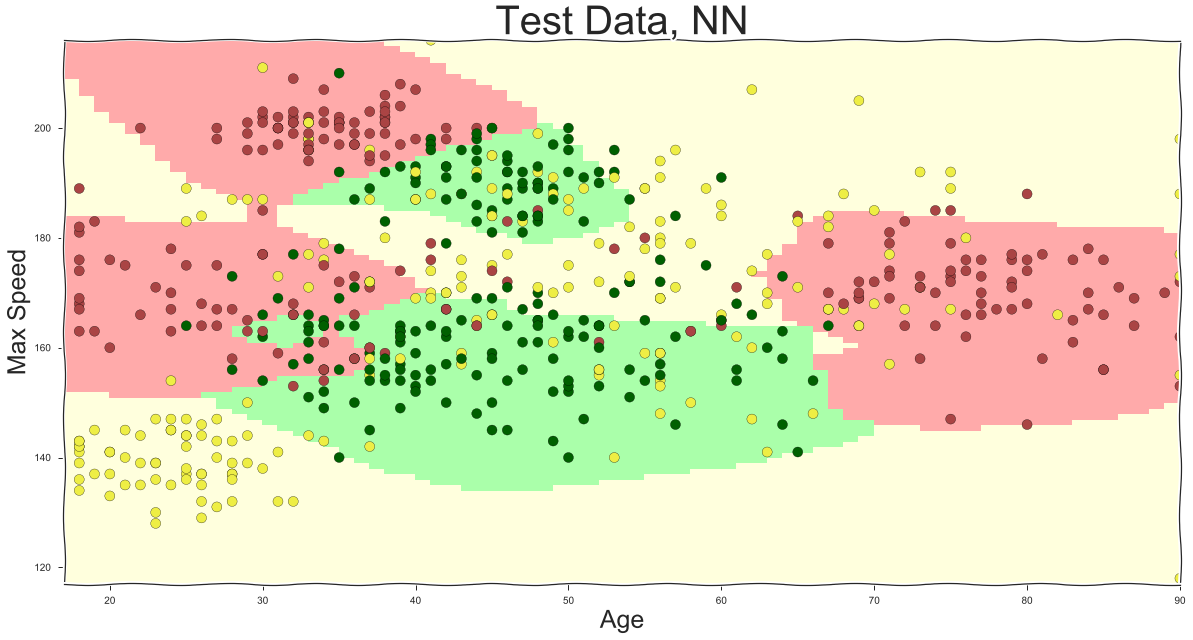

In [249]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, NN",
                fname='nn-test.png')

In [258]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# regularisation:
# - dropout
# - batch normalization
# - reduce capacity of model

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name='hidden1', input_dim=2))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(100, name='hidden2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 100)               300       
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
__________

In [259]:
BATCH_SIZE=1000
EPOCHS = 2000

%time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/2000
720/720 [==============================] - 1s 2ms/step - loss: 1.5901 - acc: 0.3528 - val_loss: 9.3583 - val_acc: 0.3389
Epoch 2/2000
720/720 [==============================] - 0s 17us/step - loss: 1.5292 - acc: 0.3819 - val_loss: 8.3367 - val_acc: 0.3389
Epoch 3/2000
720/720 [==============================] - 0s 17us/step - loss: 1.4519 - acc: 0.3806 - val_loss: 6.5504 - val_acc: 0.3389
Epoch 4/2000
720/720 [==============================] - 0s 14us/step - loss: 1.3934 - acc: 0.3819 - val_loss: 5.2261 - val_acc: 0.3389
Epoch 5/2000
720/720 [==============================] - 0s 17us/step - loss: 1.3226 - acc: 0.3944 - val_loss: 4.9140 - val_acc: 0.3722
Epoch 6/2000
720/720 [==============================] - 0s 14us/step - loss: 1.3308 - acc: 0.3903 - val_loss: 6.1775 - val_acc: 0.3278
Epoch 7/2000
720/720 [==============================] - 0s 17us/step - loss: 1.2316 - acc: 0.4556 - val_loss: 7.3391 - val_acc: 0.3278
Epoch 8/20

Epoch 61/2000
720/720 [==============================] - 0s 18us/step - loss: 0.8620 - acc: 0.6417 - val_loss: 4.8297 - val_acc: 0.3278
Epoch 62/2000
720/720 [==============================] - 0s 15us/step - loss: 0.8761 - acc: 0.6236 - val_loss: 4.7554 - val_acc: 0.3278
Epoch 63/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8906 - acc: 0.6194 - val_loss: 4.6858 - val_acc: 0.3278
Epoch 64/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8373 - acc: 0.6375 - val_loss: 4.6350 - val_acc: 0.3278
Epoch 65/2000
720/720 [==============================] - 0s 17us/step - loss: 0.9098 - acc: 0.6014 - val_loss: 4.5839 - val_acc: 0.3278
Epoch 66/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8621 - acc: 0.6194 - val_loss: 4.5310 - val_acc: 0.3278
Epoch 67/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8490 - acc: 0.6417 - val_loss: 4.4864 - val_acc: 0.3278
Epoch 68/2000
720/720 [=========================

Epoch 122/2000
720/720 [==============================] - 0s 15us/step - loss: 0.8016 - acc: 0.6556 - val_loss: 2.6547 - val_acc: 0.4222
Epoch 123/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8010 - acc: 0.6375 - val_loss: 2.6204 - val_acc: 0.4222
Epoch 124/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8074 - acc: 0.6375 - val_loss: 2.5840 - val_acc: 0.4222
Epoch 125/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7911 - acc: 0.6625 - val_loss: 2.5438 - val_acc: 0.4222
Epoch 126/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8244 - acc: 0.6389 - val_loss: 2.5019 - val_acc: 0.4278
Epoch 127/2000
720/720 [==============================] - 0s 15us/step - loss: 0.8020 - acc: 0.6639 - val_loss: 2.4589 - val_acc: 0.4278
Epoch 128/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7754 - acc: 0.6583 - val_loss: 2.4203 - val_acc: 0.4222
Epoch 129/2000
720/720 [=================

Epoch 182/2000
720/720 [==============================] - 0s 17us/step - loss: 0.8129 - acc: 0.6528 - val_loss: 1.4618 - val_acc: 0.4833
Epoch 183/2000
720/720 [==============================] - 0s 15us/step - loss: 0.8072 - acc: 0.6458 - val_loss: 1.4466 - val_acc: 0.4833
Epoch 184/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7725 - acc: 0.6667 - val_loss: 1.4347 - val_acc: 0.4833
Epoch 185/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7813 - acc: 0.6625 - val_loss: 1.4245 - val_acc: 0.4778
Epoch 186/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7718 - acc: 0.6722 - val_loss: 1.4116 - val_acc: 0.4722
Epoch 187/2000
720/720 [==============================] - 0s 22us/step - loss: 0.7700 - acc: 0.6708 - val_loss: 1.3979 - val_acc: 0.4667
Epoch 188/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7953 - acc: 0.6597 - val_loss: 1.3806 - val_acc: 0.4778
Epoch 189/2000
720/720 [=================

Epoch 242/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7683 - acc: 0.6778 - val_loss: 1.0153 - val_acc: 0.5444
Epoch 243/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7749 - acc: 0.6597 - val_loss: 1.0080 - val_acc: 0.5444
Epoch 244/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7657 - acc: 0.6583 - val_loss: 1.0009 - val_acc: 0.5500
Epoch 245/2000
720/720 [==============================] - 0s 26us/step - loss: 0.7586 - acc: 0.6764 - val_loss: 0.9929 - val_acc: 0.5444
Epoch 246/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7703 - acc: 0.6694 - val_loss: 0.9870 - val_acc: 0.5500
Epoch 247/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7631 - acc: 0.6736 - val_loss: 0.9796 - val_acc: 0.5556
Epoch 248/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7649 - acc: 0.6639 - val_loss: 0.9752 - val_acc: 0.5556
Epoch 249/2000
720/720 [=================

Epoch 302/2000
720/720 [==============================] - 0s 26us/step - loss: 0.7583 - acc: 0.6792 - val_loss: 0.7964 - val_acc: 0.6333
Epoch 303/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7480 - acc: 0.6889 - val_loss: 0.7952 - val_acc: 0.6389
Epoch 304/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7360 - acc: 0.6944 - val_loss: 0.7947 - val_acc: 0.6389
Epoch 305/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7592 - acc: 0.6639 - val_loss: 0.7952 - val_acc: 0.6389
Epoch 306/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7200 - acc: 0.6875 - val_loss: 0.7961 - val_acc: 0.6389
Epoch 307/2000
720/720 [==============================] - 0s 28us/step - loss: 0.7487 - acc: 0.6653 - val_loss: 0.7973 - val_acc: 0.6333
Epoch 308/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7596 - acc: 0.6764 - val_loss: 0.7977 - val_acc: 0.6333
Epoch 309/2000
720/720 [=================

Epoch 362/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7308 - acc: 0.6889 - val_loss: 0.7384 - val_acc: 0.6667
Epoch 363/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7537 - acc: 0.6833 - val_loss: 0.7375 - val_acc: 0.6722
Epoch 364/2000
720/720 [==============================] - 0s 31us/step - loss: 0.7438 - acc: 0.6708 - val_loss: 0.7365 - val_acc: 0.6722
Epoch 365/2000
720/720 [==============================] - 0s 24us/step - loss: 0.7381 - acc: 0.6708 - val_loss: 0.7341 - val_acc: 0.6667
Epoch 366/2000
720/720 [==============================] - 0s 19us/step - loss: 0.7559 - acc: 0.6750 - val_loss: 0.7319 - val_acc: 0.6667
Epoch 367/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7425 - acc: 0.6694 - val_loss: 0.7303 - val_acc: 0.6722
Epoch 368/2000
720/720 [==============================] - 0s 19us/step - loss: 0.7336 - acc: 0.6917 - val_loss: 0.7293 - val_acc: 0.6722
Epoch 369/2000
720/720 [=================

Epoch 422/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7504 - acc: 0.6625 - val_loss: 0.7091 - val_acc: 0.6944
Epoch 423/2000
720/720 [==============================] - 0s 22us/step - loss: 0.7418 - acc: 0.6736 - val_loss: 0.7110 - val_acc: 0.6944
Epoch 424/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7449 - acc: 0.6736 - val_loss: 0.7121 - val_acc: 0.6889
Epoch 425/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7254 - acc: 0.7028 - val_loss: 0.7130 - val_acc: 0.6778
Epoch 426/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7252 - acc: 0.6958 - val_loss: 0.7136 - val_acc: 0.6833
Epoch 427/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7070 - acc: 0.6944 - val_loss: 0.7155 - val_acc: 0.6833
Epoch 428/2000
720/720 [==============================] - 0s 19us/step - loss: 0.7232 - acc: 0.6764 - val_loss: 0.7166 - val_acc: 0.6889
Epoch 429/2000
720/720 [=================

Epoch 482/2000
720/720 [==============================] - 0s 28us/step - loss: 0.7179 - acc: 0.6819 - val_loss: 0.6893 - val_acc: 0.6833
Epoch 483/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7123 - acc: 0.6847 - val_loss: 0.6886 - val_acc: 0.6889
Epoch 484/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7308 - acc: 0.6833 - val_loss: 0.6881 - val_acc: 0.6889
Epoch 485/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7109 - acc: 0.7014 - val_loss: 0.6877 - val_acc: 0.6889
Epoch 486/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7438 - acc: 0.6778 - val_loss: 0.6872 - val_acc: 0.6889
Epoch 487/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7485 - acc: 0.6708 - val_loss: 0.6871 - val_acc: 0.6889
Epoch 488/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7169 - acc: 0.6903 - val_loss: 0.6869 - val_acc: 0.6889
Epoch 489/2000
720/720 [=================

Epoch 542/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7225 - acc: 0.7042 - val_loss: 0.6754 - val_acc: 0.6778
Epoch 543/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7078 - acc: 0.6861 - val_loss: 0.6751 - val_acc: 0.6778
Epoch 544/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7227 - acc: 0.6875 - val_loss: 0.6750 - val_acc: 0.6778
Epoch 545/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7042 - acc: 0.6944 - val_loss: 0.6750 - val_acc: 0.6833
Epoch 546/2000
720/720 [==============================] - 0s 28us/step - loss: 0.7300 - acc: 0.6958 - val_loss: 0.6751 - val_acc: 0.6778
Epoch 547/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7359 - acc: 0.6847 - val_loss: 0.6750 - val_acc: 0.6833
Epoch 548/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7166 - acc: 0.6861 - val_loss: 0.6747 - val_acc: 0.6833
Epoch 549/2000
720/720 [=================

Epoch 602/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7178 - acc: 0.6958 - val_loss: 0.6676 - val_acc: 0.7000
Epoch 603/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7183 - acc: 0.6847 - val_loss: 0.6676 - val_acc: 0.7000
Epoch 604/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7190 - acc: 0.6847 - val_loss: 0.6673 - val_acc: 0.7111
Epoch 605/2000
720/720 [==============================] - 0s 26us/step - loss: 0.7135 - acc: 0.7125 - val_loss: 0.6669 - val_acc: 0.7111
Epoch 606/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7219 - acc: 0.7056 - val_loss: 0.6660 - val_acc: 0.7111
Epoch 607/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7276 - acc: 0.6986 - val_loss: 0.6651 - val_acc: 0.7000
Epoch 608/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7163 - acc: 0.6944 - val_loss: 0.6641 - val_acc: 0.7000
Epoch 609/2000
720/720 [=================

Epoch 662/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6847 - acc: 0.6986 - val_loss: 0.6593 - val_acc: 0.7167
Epoch 663/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7056 - acc: 0.7028 - val_loss: 0.6590 - val_acc: 0.7111
Epoch 664/2000
720/720 [==============================] - 0s 29us/step - loss: 0.7247 - acc: 0.6944 - val_loss: 0.6587 - val_acc: 0.7111
Epoch 665/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7083 - acc: 0.6958 - val_loss: 0.6584 - val_acc: 0.7111
Epoch 666/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7178 - acc: 0.6861 - val_loss: 0.6582 - val_acc: 0.7000
Epoch 667/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7036 - acc: 0.7028 - val_loss: 0.6587 - val_acc: 0.7000
Epoch 668/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7316 - acc: 0.6917 - val_loss: 0.6592 - val_acc: 0.6944
Epoch 669/2000
720/720 [=================

Epoch 722/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6852 - acc: 0.7028 - val_loss: 0.6717 - val_acc: 0.6833
Epoch 723/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6906 - acc: 0.7111 - val_loss: 0.6691 - val_acc: 0.6889
Epoch 724/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7145 - acc: 0.6958 - val_loss: 0.6671 - val_acc: 0.6778
Epoch 725/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7170 - acc: 0.7139 - val_loss: 0.6656 - val_acc: 0.6833
Epoch 726/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6964 - acc: 0.7083 - val_loss: 0.6647 - val_acc: 0.6833
Epoch 727/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6949 - acc: 0.7222 - val_loss: 0.6641 - val_acc: 0.6889
Epoch 728/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7040 - acc: 0.7069 - val_loss: 0.6634 - val_acc: 0.6889
Epoch 729/2000
720/720 [=================

Epoch 782/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6861 - acc: 0.7028 - val_loss: 0.6591 - val_acc: 0.6889
Epoch 783/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6942 - acc: 0.6958 - val_loss: 0.6613 - val_acc: 0.6889
Epoch 784/2000
720/720 [==============================] - 0s 35us/step - loss: 0.6996 - acc: 0.7014 - val_loss: 0.6632 - val_acc: 0.6833
Epoch 785/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7027 - acc: 0.6958 - val_loss: 0.6644 - val_acc: 0.6833
Epoch 786/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7052 - acc: 0.7000 - val_loss: 0.6656 - val_acc: 0.6778
Epoch 787/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6719 - acc: 0.7167 - val_loss: 0.6651 - val_acc: 0.6778
Epoch 788/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6964 - acc: 0.7194 - val_loss: 0.6648 - val_acc: 0.6778
Epoch 789/2000
720/720 [=================

Epoch 842/2000
720/720 [==============================] - 0s 24us/step - loss: 0.7027 - acc: 0.7042 - val_loss: 0.6590 - val_acc: 0.6889
Epoch 843/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6985 - acc: 0.6944 - val_loss: 0.6597 - val_acc: 0.6889
Epoch 844/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6737 - acc: 0.7278 - val_loss: 0.6596 - val_acc: 0.6889
Epoch 845/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6849 - acc: 0.7014 - val_loss: 0.6586 - val_acc: 0.6889
Epoch 846/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6982 - acc: 0.7097 - val_loss: 0.6574 - val_acc: 0.6944
Epoch 847/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6849 - acc: 0.6944 - val_loss: 0.6574 - val_acc: 0.7000
Epoch 848/2000
720/720 [==============================] - 0s 22us/step - loss: 0.7011 - acc: 0.7014 - val_loss: 0.6575 - val_acc: 0.7000
Epoch 849/2000
720/720 [=================

Epoch 902/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6922 - acc: 0.7028 - val_loss: 0.6655 - val_acc: 0.6944
Epoch 903/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6928 - acc: 0.7042 - val_loss: 0.6670 - val_acc: 0.6944
Epoch 904/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6722 - acc: 0.7083 - val_loss: 0.6690 - val_acc: 0.6833
Epoch 905/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6935 - acc: 0.7056 - val_loss: 0.6711 - val_acc: 0.6778
Epoch 906/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6979 - acc: 0.7056 - val_loss: 0.6732 - val_acc: 0.6778
Epoch 907/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6979 - acc: 0.7097 - val_loss: 0.6748 - val_acc: 0.6778
Epoch 908/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7032 - acc: 0.7153 - val_loss: 0.6783 - val_acc: 0.6833
Epoch 909/2000
720/720 [=================

Epoch 962/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6924 - acc: 0.7028 - val_loss: 0.6502 - val_acc: 0.7056
Epoch 963/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6872 - acc: 0.6903 - val_loss: 0.6503 - val_acc: 0.7000
Epoch 964/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6821 - acc: 0.7181 - val_loss: 0.6505 - val_acc: 0.7000
Epoch 965/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6669 - acc: 0.7111 - val_loss: 0.6502 - val_acc: 0.7000
Epoch 966/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6980 - acc: 0.7069 - val_loss: 0.6499 - val_acc: 0.7000
Epoch 967/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6795 - acc: 0.7208 - val_loss: 0.6498 - val_acc: 0.7000
Epoch 968/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6752 - acc: 0.7056 - val_loss: 0.6488 - val_acc: 0.7000
Epoch 969/2000
720/720 [=================

Epoch 1022/2000
720/720 [==============================] - 0s 21us/step - loss: 0.7038 - acc: 0.6931 - val_loss: 0.6635 - val_acc: 0.7000
Epoch 1023/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6805 - acc: 0.6903 - val_loss: 0.6616 - val_acc: 0.7056
Epoch 1024/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6902 - acc: 0.7042 - val_loss: 0.6588 - val_acc: 0.7056
Epoch 1025/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6742 - acc: 0.7278 - val_loss: 0.6569 - val_acc: 0.7056
Epoch 1026/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6715 - acc: 0.7083 - val_loss: 0.6561 - val_acc: 0.7056
Epoch 1027/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6836 - acc: 0.7139 - val_loss: 0.6560 - val_acc: 0.6944
Epoch 1028/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6955 - acc: 0.7014 - val_loss: 0.6559 - val_acc: 0.6889
Epoch 1029/2000
720/720 [=========

Epoch 1082/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6781 - acc: 0.7319 - val_loss: 0.6478 - val_acc: 0.7167
Epoch 1083/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6925 - acc: 0.7167 - val_loss: 0.6498 - val_acc: 0.7167
Epoch 1084/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6779 - acc: 0.7097 - val_loss: 0.6518 - val_acc: 0.7167
Epoch 1085/2000
720/720 [==============================] - 0s 31us/step - loss: 0.6793 - acc: 0.7153 - val_loss: 0.6537 - val_acc: 0.7167
Epoch 1086/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7021 - acc: 0.6889 - val_loss: 0.6551 - val_acc: 0.7111
Epoch 1087/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6681 - acc: 0.7111 - val_loss: 0.6574 - val_acc: 0.7056
Epoch 1088/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6683 - acc: 0.7139 - val_loss: 0.6600 - val_acc: 0.7056
Epoch 1089/2000
720/720 [=========

Epoch 1142/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6856 - acc: 0.7167 - val_loss: 0.6520 - val_acc: 0.6833
Epoch 1143/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6670 - acc: 0.7181 - val_loss: 0.6530 - val_acc: 0.6833
Epoch 1144/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6645 - acc: 0.7111 - val_loss: 0.6534 - val_acc: 0.6833
Epoch 1145/2000
720/720 [==============================] - 0s 17us/step - loss: 0.7058 - acc: 0.6944 - val_loss: 0.6537 - val_acc: 0.6944
Epoch 1146/2000
720/720 [==============================] - 0s 29us/step - loss: 0.6599 - acc: 0.7319 - val_loss: 0.6539 - val_acc: 0.6889
Epoch 1147/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6717 - acc: 0.7139 - val_loss: 0.6537 - val_acc: 0.6944
Epoch 1148/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6769 - acc: 0.7125 - val_loss: 0.6536 - val_acc: 0.6944
Epoch 1149/2000
720/720 [=========

Epoch 1202/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6807 - acc: 0.7028 - val_loss: 0.6459 - val_acc: 0.7111
Epoch 1203/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6810 - acc: 0.7056 - val_loss: 0.6460 - val_acc: 0.7111
Epoch 1204/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6907 - acc: 0.6889 - val_loss: 0.6461 - val_acc: 0.7056
Epoch 1205/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6758 - acc: 0.7208 - val_loss: 0.6461 - val_acc: 0.7056
Epoch 1206/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6739 - acc: 0.7292 - val_loss: 0.6458 - val_acc: 0.7056
Epoch 1207/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6758 - acc: 0.7319 - val_loss: 0.6453 - val_acc: 0.7056
Epoch 1208/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6624 - acc: 0.7194 - val_loss: 0.6449 - val_acc: 0.7000
Epoch 1209/2000
720/720 [=========

Epoch 1262/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6718 - acc: 0.7333 - val_loss: 0.6624 - val_acc: 0.6889
Epoch 1263/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6549 - acc: 0.7056 - val_loss: 0.6635 - val_acc: 0.6889
Epoch 1264/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6811 - acc: 0.7208 - val_loss: 0.6652 - val_acc: 0.6889
Epoch 1265/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6729 - acc: 0.7111 - val_loss: 0.6665 - val_acc: 0.6889
Epoch 1266/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6695 - acc: 0.7222 - val_loss: 0.6683 - val_acc: 0.6889
Epoch 1267/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6575 - acc: 0.7042 - val_loss: 0.6697 - val_acc: 0.6944
Epoch 1268/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6668 - acc: 0.7153 - val_loss: 0.6714 - val_acc: 0.6944
Epoch 1269/2000
720/720 [=========

Epoch 1322/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6684 - acc: 0.7153 - val_loss: 0.6424 - val_acc: 0.7167
Epoch 1323/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6559 - acc: 0.7236 - val_loss: 0.6440 - val_acc: 0.7111
Epoch 1324/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6603 - acc: 0.7222 - val_loss: 0.6459 - val_acc: 0.7000
Epoch 1325/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6774 - acc: 0.7056 - val_loss: 0.6482 - val_acc: 0.6944
Epoch 1326/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6482 - acc: 0.7403 - val_loss: 0.6507 - val_acc: 0.6889
Epoch 1327/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6734 - acc: 0.7097 - val_loss: 0.6529 - val_acc: 0.6889
Epoch 1328/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6604 - acc: 0.7403 - val_loss: 0.6545 - val_acc: 0.6889
Epoch 1329/2000
720/720 [=========

Epoch 1382/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6697 - acc: 0.7208 - val_loss: 0.6434 - val_acc: 0.7111
Epoch 1383/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6623 - acc: 0.7306 - val_loss: 0.6443 - val_acc: 0.7167
Epoch 1384/2000
720/720 [==============================] - 0s 1us/step - loss: 0.6721 - acc: 0.7194 - val_loss: 0.6447 - val_acc: 0.7167
Epoch 1385/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6656 - acc: 0.7181 - val_loss: 0.6454 - val_acc: 0.7111
Epoch 1386/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6796 - acc: 0.7167 - val_loss: 0.6464 - val_acc: 0.7111
Epoch 1387/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6478 - acc: 0.7139 - val_loss: 0.6476 - val_acc: 0.7111
Epoch 1388/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6730 - acc: 0.7292 - val_loss: 0.6486 - val_acc: 0.7111
Epoch 1389/2000
720/720 [============

Epoch 1442/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6635 - acc: 0.7222 - val_loss: 0.6530 - val_acc: 0.7222
Epoch 1443/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6587 - acc: 0.7194 - val_loss: 0.6536 - val_acc: 0.7222
Epoch 1444/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6637 - acc: 0.7264 - val_loss: 0.6544 - val_acc: 0.7278
Epoch 1445/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6505 - acc: 0.7125 - val_loss: 0.6539 - val_acc: 0.7167
Epoch 1446/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6658 - acc: 0.7153 - val_loss: 0.6526 - val_acc: 0.7222
Epoch 1447/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6588 - acc: 0.7375 - val_loss: 0.6514 - val_acc: 0.7222
Epoch 1448/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6627 - acc: 0.7097 - val_loss: 0.6500 - val_acc: 0.7222
Epoch 1449/2000
720/720 [=========

Epoch 1502/2000
720/720 [==============================] - 0s 32us/step - loss: 0.6494 - acc: 0.7264 - val_loss: 0.6416 - val_acc: 0.7222
Epoch 1503/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6715 - acc: 0.7139 - val_loss: 0.6414 - val_acc: 0.7222
Epoch 1504/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6471 - acc: 0.7181 - val_loss: 0.6417 - val_acc: 0.7222
Epoch 1505/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6887 - acc: 0.7069 - val_loss: 0.6421 - val_acc: 0.7222
Epoch 1506/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6574 - acc: 0.7042 - val_loss: 0.6425 - val_acc: 0.7222
Epoch 1507/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6295 - acc: 0.7319 - val_loss: 0.6433 - val_acc: 0.7222
Epoch 1508/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6565 - acc: 0.7236 - val_loss: 0.6438 - val_acc: 0.7222
Epoch 1509/2000
720/720 [=========

Epoch 1562/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6609 - acc: 0.7264 - val_loss: 0.6558 - val_acc: 0.7056
Epoch 1563/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6523 - acc: 0.7181 - val_loss: 0.6542 - val_acc: 0.7056
Epoch 1564/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6510 - acc: 0.7208 - val_loss: 0.6533 - val_acc: 0.7056
Epoch 1565/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6491 - acc: 0.7194 - val_loss: 0.6524 - val_acc: 0.7056
Epoch 1566/2000
720/720 [==============================] - 0s 29us/step - loss: 0.6360 - acc: 0.7222 - val_loss: 0.6523 - val_acc: 0.7056
Epoch 1567/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6526 - acc: 0.7181 - val_loss: 0.6514 - val_acc: 0.7056
Epoch 1568/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6708 - acc: 0.7111 - val_loss: 0.6506 - val_acc: 0.7000
Epoch 1569/2000
720/720 [=========

Epoch 1622/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6543 - acc: 0.7139 - val_loss: 0.6570 - val_acc: 0.7056
Epoch 1623/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6471 - acc: 0.7264 - val_loss: 0.6568 - val_acc: 0.7056
Epoch 1624/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6608 - acc: 0.7292 - val_loss: 0.6556 - val_acc: 0.7111
Epoch 1625/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6623 - acc: 0.7083 - val_loss: 0.6550 - val_acc: 0.7167
Epoch 1626/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6429 - acc: 0.7389 - val_loss: 0.6546 - val_acc: 0.7222
Epoch 1627/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6595 - acc: 0.7167 - val_loss: 0.6541 - val_acc: 0.7278
Epoch 1628/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6576 - acc: 0.7111 - val_loss: 0.6536 - val_acc: 0.7278
Epoch 1629/2000
720/720 [=========

Epoch 1682/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6453 - acc: 0.7333 - val_loss: 0.6543 - val_acc: 0.7000
Epoch 1683/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6538 - acc: 0.7139 - val_loss: 0.6535 - val_acc: 0.7000
Epoch 1684/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6695 - acc: 0.7153 - val_loss: 0.6532 - val_acc: 0.7056
Epoch 1685/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6584 - acc: 0.7181 - val_loss: 0.6526 - val_acc: 0.7000
Epoch 1686/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6487 - acc: 0.7306 - val_loss: 0.6530 - val_acc: 0.6944
Epoch 1687/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6544 - acc: 0.7236 - val_loss: 0.6540 - val_acc: 0.6889
Epoch 1688/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6381 - acc: 0.7306 - val_loss: 0.6549 - val_acc: 0.6889
Epoch 1689/2000
720/720 [=========

Epoch 1742/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6475 - acc: 0.7181 - val_loss: 0.6496 - val_acc: 0.7000
Epoch 1743/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6362 - acc: 0.7292 - val_loss: 0.6498 - val_acc: 0.6944
Epoch 1744/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6700 - acc: 0.7111 - val_loss: 0.6499 - val_acc: 0.6944
Epoch 1745/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6495 - acc: 0.7194 - val_loss: 0.6508 - val_acc: 0.7000
Epoch 1746/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6371 - acc: 0.7306 - val_loss: 0.6520 - val_acc: 0.6944
Epoch 1747/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6392 - acc: 0.7306 - val_loss: 0.6530 - val_acc: 0.6944
Epoch 1748/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6387 - acc: 0.7236 - val_loss: 0.6538 - val_acc: 0.6944
Epoch 1749/2000
720/720 [=========

Epoch 1802/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6613 - acc: 0.7306 - val_loss: 0.6447 - val_acc: 0.7167
Epoch 1803/2000
720/720 [==============================] - 0s 29us/step - loss: 0.6609 - acc: 0.7250 - val_loss: 0.6458 - val_acc: 0.7167
Epoch 1804/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6566 - acc: 0.7194 - val_loss: 0.6470 - val_acc: 0.7222
Epoch 1805/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6523 - acc: 0.7389 - val_loss: 0.6487 - val_acc: 0.7222
Epoch 1806/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6536 - acc: 0.7264 - val_loss: 0.6495 - val_acc: 0.7222
Epoch 1807/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6535 - acc: 0.7208 - val_loss: 0.6502 - val_acc: 0.7167
Epoch 1808/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6513 - acc: 0.7361 - val_loss: 0.6511 - val_acc: 0.7167
Epoch 1809/2000
720/720 [=========

Epoch 1862/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6386 - acc: 0.7333 - val_loss: 0.6407 - val_acc: 0.7167
Epoch 1863/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6373 - acc: 0.7361 - val_loss: 0.6414 - val_acc: 0.7167
Epoch 1864/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6553 - acc: 0.7194 - val_loss: 0.6423 - val_acc: 0.7167
Epoch 1865/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6481 - acc: 0.7250 - val_loss: 0.6428 - val_acc: 0.7167
Epoch 1866/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6600 - acc: 0.7125 - val_loss: 0.6436 - val_acc: 0.7111
Epoch 1867/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6356 - acc: 0.7264 - val_loss: 0.6440 - val_acc: 0.7167
Epoch 1868/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6609 - acc: 0.7236 - val_loss: 0.6442 - val_acc: 0.7222
Epoch 1869/2000
720/720 [=========

Epoch 1922/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6443 - acc: 0.7222 - val_loss: 0.6527 - val_acc: 0.7111
Epoch 1923/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6505 - acc: 0.7097 - val_loss: 0.6509 - val_acc: 0.7167
Epoch 1924/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6623 - acc: 0.7153 - val_loss: 0.6492 - val_acc: 0.7111
Epoch 1925/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6619 - acc: 0.7264 - val_loss: 0.6474 - val_acc: 0.7111
Epoch 1926/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6502 - acc: 0.7333 - val_loss: 0.6455 - val_acc: 0.7056
Epoch 1927/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6555 - acc: 0.7208 - val_loss: 0.6433 - val_acc: 0.7000
Epoch 1928/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6413 - acc: 0.7181 - val_loss: 0.6417 - val_acc: 0.7000
Epoch 1929/2000
720/720 [=========

Epoch 1982/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6535 - acc: 0.7264 - val_loss: 0.6527 - val_acc: 0.7111
Epoch 1983/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6235 - acc: 0.7292 - val_loss: 0.6519 - val_acc: 0.7167
Epoch 1984/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6621 - acc: 0.7278 - val_loss: 0.6517 - val_acc: 0.7167
Epoch 1985/2000
720/720 [==============================] - 0s 32us/step - loss: 0.6518 - acc: 0.7319 - val_loss: 0.6499 - val_acc: 0.7111
Epoch 1986/2000
720/720 [==============================] - 0s 19us/step - loss: 0.6645 - acc: 0.7181 - val_loss: 0.6506 - val_acc: 0.7167
Epoch 1987/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6441 - acc: 0.7264 - val_loss: 0.6514 - val_acc: 0.7167
Epoch 1988/2000
720/720 [==============================] - 0s 18us/step - loss: 0.6601 - acc: 0.7278 - val_loss: 0.6533 - val_acc: 0.7167
Epoch 1989/2000
720/720 [=========

In [260]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

900/900 [==============================] - 0s 4us/step


0.7288888692855835

In [261]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

600/600 [==============================] - 0s 7us/step


0.699999988079071

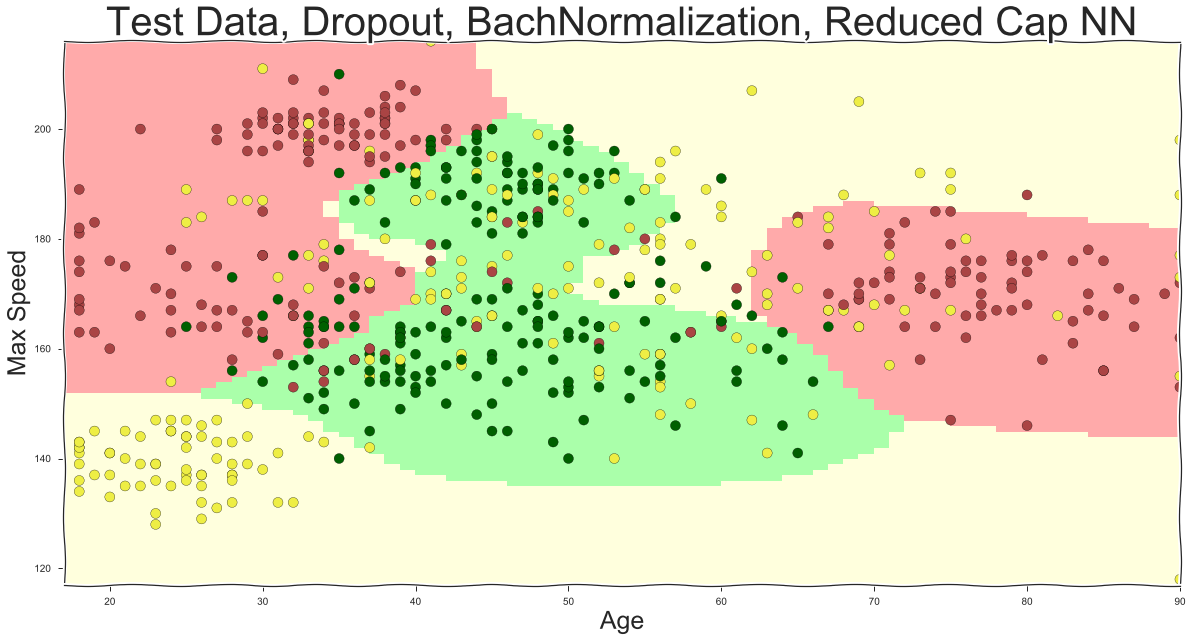

In [266]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Dropout, BachNormalization, Reduced Cap NN",
                fname='nn-reg-test.png')